# settings

In [1]:
import sys
sys.path.append('../../')

from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from scripts.simulator import VariableLocalTransaction
# from scripts.variable_local import AutoAdjustmentTransactionMulti
from scripts.exec_simulator import ExecuteAutoAdjustmentTransactionSingle, ExecuteAutoAdjustmentTransactionMulti
from scripts.price_data.get_price import GetPriceData
from scripts.visualizer import LogVisualizer
from scripts.types import PortfolioItem, PortfolioWithPriorityItem, TransactionOption

price_getter = GetPriceData()

from pprint import pprint

# portfolio

## Borrower portfolio

In [2]:
# a
borrower_portfolio_a = {
    'JPY': {
        'num': 50000000,
        'is_usd': False,
        'priority': 10,
    },
    '8306.T': {
        'num': 2000000,
        'is_usd': False,
        'priority': 1,
    },
    '8604.T': {
        'num': 100000,
        'is_usd': False,
        'priority': 0,
    }
}

# 担保急落シナリオ
borrower_portfolio_down = {
    '8306.T': {
        'num': 3000000,
        'is_usd': False,
        'priority': 1,
    },
    '8604.T': {
        'num': 7000000,
        'is_usd': False,
        'priority': 0,
    }
}

'^TNX'


In [3]:
912 * 3000000 + 490 * 7000000

6166000000

## Lender portfolio

In [4]:
# NVIDIA
lender_portfolio_a = {
    'NVDA': {
        'num': 50000,
        'is_usd': True
    },
    'AAPL': {
        'num': 50000,
        'is_usd': True
    },
}

# 担保急落シナリオ
lender_portfolio_jpy = {
    'JPY': {
        'num': 5000000000,
        'is_usd': False,
        'priority': 1,
    }
}

# models (options)

## model0
現行手続きモデル

In [14]:
options_0 = {}

## model1
ベースモデル（単一トークン価格調整、マージンコール閾値設定なし）

In [15]:
options_1: TransactionOption = {
    'lender_loan_ratio': 1.05,
    'print_log': True,
    'auto_deposit': True,
    'is_dummy_data': False,
    'is_reverse': False,
}

## model2
ベースモデル（複数トークン価格調整、マージンコール閾値設定なし）

In [16]:
options_2 = {
    'lender_loan_ratio': 1.05,
    'print_log': True,
    'auto_deposit': True,
    'is_dummy_data': False,
    'is_reverse': False,
}

## model3
ベースモデル（単一トークン価格調整、マージンコール閾値設定あり）

In [17]:
options_3 = {
    'lender_loan_ratio': 1.05,
    'print_log': True,
    'auto_deposit': True,
    'is_dummy_data': False,
    'is_reverse': False,
    'margin_call_threshold': 0.05
}

## model4
ベースモデル（複数トークン価格調整、マージンコール閾値設定あり）

In [18]:
options_4 = {
    'lender_loan_ratio': 1.05,
    'print_log': True,
    'auto_deposit': True,
    'is_dummy_data': False,
    'is_reverse': False,
    'margin_call_threshold': 0.05
}

# simulations

In [19]:
# シミュレーションの日付設定
start_date = date(2008, 9, 1)
# end_date = date(2008, 11, 1)
end_date = date(2009, 9, 1)

## model0
現行手続きモデル

## model1
ベースモデル（単一トークン価格調整、マージンコール閾値設定なし）

In [20]:
simulator_1 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy, start_date, end_date,  options=options_1)
print('Start simulation model1...')
%time logs_1 = simulator_1.execute()
print("End simulation model1!!!")

("JCT portfolio: {'8306.T': {'num': 3000000, 'is_usd': False, 'priority': 1}, "
 "'8604.T': {'num': 7000000, 'is_usd': False, 'priority': 0}}")
"ST portfolio: {'JPY': {'num': 5000000000, 'is_usd': False, 'priority': 1}}"
2008-09-01: Price updating...
JPY: 1.0
2008-09-01: Price updating...
8306.T: 824.0
8604.T: 1423.0
"8306.T: {'num': 3000000, 'is_usd': False, 'priority': 1, 'price': 824.0}"
"8604.T: {'num': 7000000, 'is_usd': False, 'priority': 0, 'price': 1423.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
Transaction is created.
{'additional_issue': [False],
 'collateral_portfolio': [{'8306.T': {'is_usd': False,
                                      'num': 3000000,
                                      'price': 824.0,
                                      'priority': 1},
                           '8604.T': {'is_usd': False,
                                      'num': 1952214,
                                      'price': 1423.0,
                             

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-09-17
2008-09-17: Price updating...
JPY: 1.0
2008-09-17: Price updating...
8306.T: 800.0
8604.T: 1273.0
adjust with a single token
from Borrower(A) to Lender(B)
collateral num is short@@@@@@@@@
!!!!additional token issuing by Borrower(A)!!!!
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-09-18
2008-09-18: Price updating...
JPY: 1.0
2008-09-18: Price updating...
8306.T: 773.0
8604.T: 1191.0
adjust with a single token
from Borrower(A) to Lender(B)
collateral num is short@@@@@@@@@
!!!!additional token issuing by Borrower(A)!!!!
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@

2008-10-06: Price updating...
8306.T: 806.0
8604.T: 1241.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-07
2008-10-07: Price updating...
JPY: 1.0
2008-10-07: Price updating...
8306.T: 811.0
8604.T: 1250.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-08
2008-10-08: Price updating...
JPY: 1.0
2008-10-08: Price updating...
8306.T: 763.0
8604.T: 1171.0
adjust with a single token
from Borrower(A) to Lender(B)
collateral num is short@@@@@@@@@
!!!!additiona

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-26
2008-10-26: Price updating...
JPY: 1.0
2008-10-26: Price updating...
8306.T: 583.0
8604.T: 904.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-27
2008-10-27: Price updating...
JPY: 1.0
2008-10-27: Price updating...
8306.T: 583.0
8604.T: 904.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

2008-11-14: Price updating...
8306.T: 595.0
8604.T: 861.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-11-15
2008-11-15: Price updating...
JPY: 1.0
2008-11-15: Price updating...
8306.T: 585.0
8604.T: 837.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-11-16
2008-11-16: Price updating...
JPY: 1.0
2008-11-16: Price updating...
8306.T: 585.0
8604.T: 837.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully do

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-04
2008-12-04: Price updating...
JPY: 1.0
2008-12-04: Price updating...
8306.T: 460.0
8604.T: 587.0
adjust with a single token
from Borrower(A) to Lender(B)
collateral num is short@@@@@@@@@
!!!!additional token issuing by Borrower(A)!!!!
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-05
2008-12-05: Price updating...
JPY: 1.0
2008-12-05: Price updating...
8306.T: 435.0
8604.T: 611.0
adjust with a single token
from Borrower(A) to Lender(B)
collateral num is short@@@@@@@@@
!!!!additional token issuing by Borrower(A)!!!!
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@

2008-12-23: Price updating...
8306.T: 533.0
8604.T: 711.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-24
2008-12-24: Price updating...
JPY: 1.0
2008-12-24: Price updating...
8306.T: 533.0
8604.T: 711.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-25
2008-12-25: Price updating...
JPY: 1.0
2008-12-25: Price updating...
8306.T: 545.0
8604.T: 718.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully do

2009-01-12: Price updating...
JPY: 1.0
2009-01-12: Price updating...
8306.T: 526.0
8604.T: 662.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-13
2009-01-13: Price updating...
JPY: 1.0
2009-01-13: Price updating...
8306.T: 526.0
8604.T: 662.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-14
2009-01-14: Price updating...
JPY: 1.0
2009-01-14: Price updating...
8306.T: 524.0
8604.T: 679.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@

2009-02-01: Price updating...
JPY: 1.0
2009-02-01: Price updating...
8306.T: 485.0
8604.T: 569.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-02-02
2009-02-02: Price updating...
JPY: 1.0
2009-02-02: Price updating...
8306.T: 485.0
8604.T: 569.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-02-03
2009-02-03: Price updating...
JPY: 1.0
2009-02-03: Price updating...
8306.T: 481.0
8604.T: 561.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-02-21
2009-02-21: Price updating...
JPY: 1.0
2009-02-21: Price updating...
8306.T: 427.0
8604.T: 463.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-02-22
2009-02-22: Price updating...
JPY: 1.0
2009-02-22: Price updating...
8306.T: 427.0
8604.T: 463.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-03-12: Price updating...
JPY: 1.0
2009-03-12: Price updating...
8306.T: 396.0
8604.T: 449.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-03-13
2009-03-13: Price updating...
JPY: 1.0
2009-03-13: Price updating...
8306.T: 419.0
8604.T: 469.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-03-14
2009-03-14: Price updating...
JPY: 1.0
2009-03-14: Price updating...
8306.T: 441.0
8604.T: 481.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@

2009-04-01: Price updating...
JPY: 1.0
2009-04-01: Price updating...
8306.T: 495.0
8604.T: 511.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-02
2009-04-02: Price updating...
JPY: 1.0
2009-04-02: Price updating...
8306.T: 528.0
8604.T: 563.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-03
2009-04-03: Price updating...
JPY: 1.0
2009-04-03: Price updating...
8306.T: 526.0
8604.T: 590.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@

2009-04-21: Price updating...
JPY: 1.0
2009-04-21: Price updating...
8306.T: 491.0
8604.T: 578.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-22
2009-04-22: Price updating...
JPY: 1.0
2009-04-22: Price updating...
8306.T: 479.0
8604.T: 598.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-23
2009-04-23: Price updating...
JPY: 1.0
2009-04-23: Price updating...
8306.T: 478.0
8604.T: 598.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@

2009-05-11: Price updating...
JPY: 1.0
2009-05-11: Price updating...
8306.T: 674.0
8604.T: 713.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-12
2009-05-12: Price updating...
JPY: 1.0
2009-05-12: Price updating...
8306.T: 640.0
8604.T: 677.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-13
2009-05-13: Price updating...
JPY: 1.0
2009-05-13: Price updating...
8306.T: 625.0
8604.T: 678.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@

2009-05-31: Price updating...
JPY: 1.0
2009-05-31: Price updating...
8306.T: 616.0
8604.T: 742.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-06-01
2009-06-01: Price updating...
JPY: 1.0
2009-06-01: Price updating...
8306.T: 616.0
8604.T: 742.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-06-02
2009-06-02: Price updating...
JPY: 1.0
2009-06-02: Price updating...
8306.T: 621.0
8604.T: 737.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@

2009-06-20: Price updating...
JPY: 1.0
2009-06-20: Price updating...
8306.T: 615.0
8604.T: 822.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-06-21
2009-06-21: Price updating...
JPY: 1.0
2009-06-21: Price updating...
8306.T: 615.0
8604.T: 822.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-06-22
2009-06-22: Price updating...
JPY: 1.0
2009-06-22: Price updating...
8306.T: 615.0
8604.T: 822.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@

2009-07-10: Price updating...
JPY: 1.0
2009-07-10: Price updating...
8306.T: 538.0
8604.T: 710.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-07-11
2009-07-11: Price updating...
JPY: 1.0
2009-07-11: Price updating...
8306.T: 533.0
8604.T: 668.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-07-12
2009-07-12: Price updating...
JPY: 1.0
2009-07-12: Price updating...
8306.T: 533.0
8604.T: 668.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@

2009-07-30: Price updating...
JPY: 1.0
2009-07-30: Price updating...
8306.T: 542.0
8604.T: 818.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-07-31
2009-07-31: Price updating...
JPY: 1.0
2009-07-31: Price updating...
8306.T: 566.0
8604.T: 829.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-01
2009-08-01: Price updating...
JPY: 1.0
2009-08-01: Price updating...
8306.T: 600.0
8604.T: 832.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@

2009-08-19: Price updating...
JPY: 1.0
2009-08-19: Price updating...
8306.T: 584.0
8604.T: 799.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-20
2009-08-20: Price updating...
JPY: 1.0
2009-08-20: Price updating...
8306.T: 590.0
8604.T: 815.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-21
2009-08-21: Price updating...
JPY: 1.0
2009-08-21: Price updating...
8306.T: 588.0
8604.T: 805.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@

Log Visualizer initialized.
{'8306.T': [1.0, 1.0031913333333333, 0.995027, 1.0489393333333332, 1.1463873333333334, 0.9096966666666667, 0.909697, 0.9096966666666667, 0.9336963333333334, 0.8693426666666667, 0.9877733333333333, 0.943687, 1.1390006666666668, 1.1390003333333334, 1.1390006666666668, 1.1390003333333334, 1.1520133333333333, 1.2612823333333334, 1.0449963333333334, 0.9125216666666667, 0.912522, 0.9125216666666667, 0.8233323333333333, 0.8233326666666667, 0.871616, 0.853616, 0.8738463333333333, 0.873846, 0.8738463333333333, 0.9934173333333334, 0.905431, 0.974113, 0.9850873333333333, 1.1692733333333334, 1.169273, 1.1692733333333334, 1.1548426666666667, 1.29487, 1.2245396666666666, 1.3420366666666668, 1.0156766666666666, 1.015677, 1.0156766666666666, 1.015677, 1.01158, 1.294674, 1.218639, 1.1609606666666668, 1.160961, 1.1609606666666668, 1.0303383333333334, 1.225182, 1.3191676666666667, 1.5570593333333334, 1.992681, 1.9926806666666668, 1.992681, 2.1060463333333335, 2.002886333333333

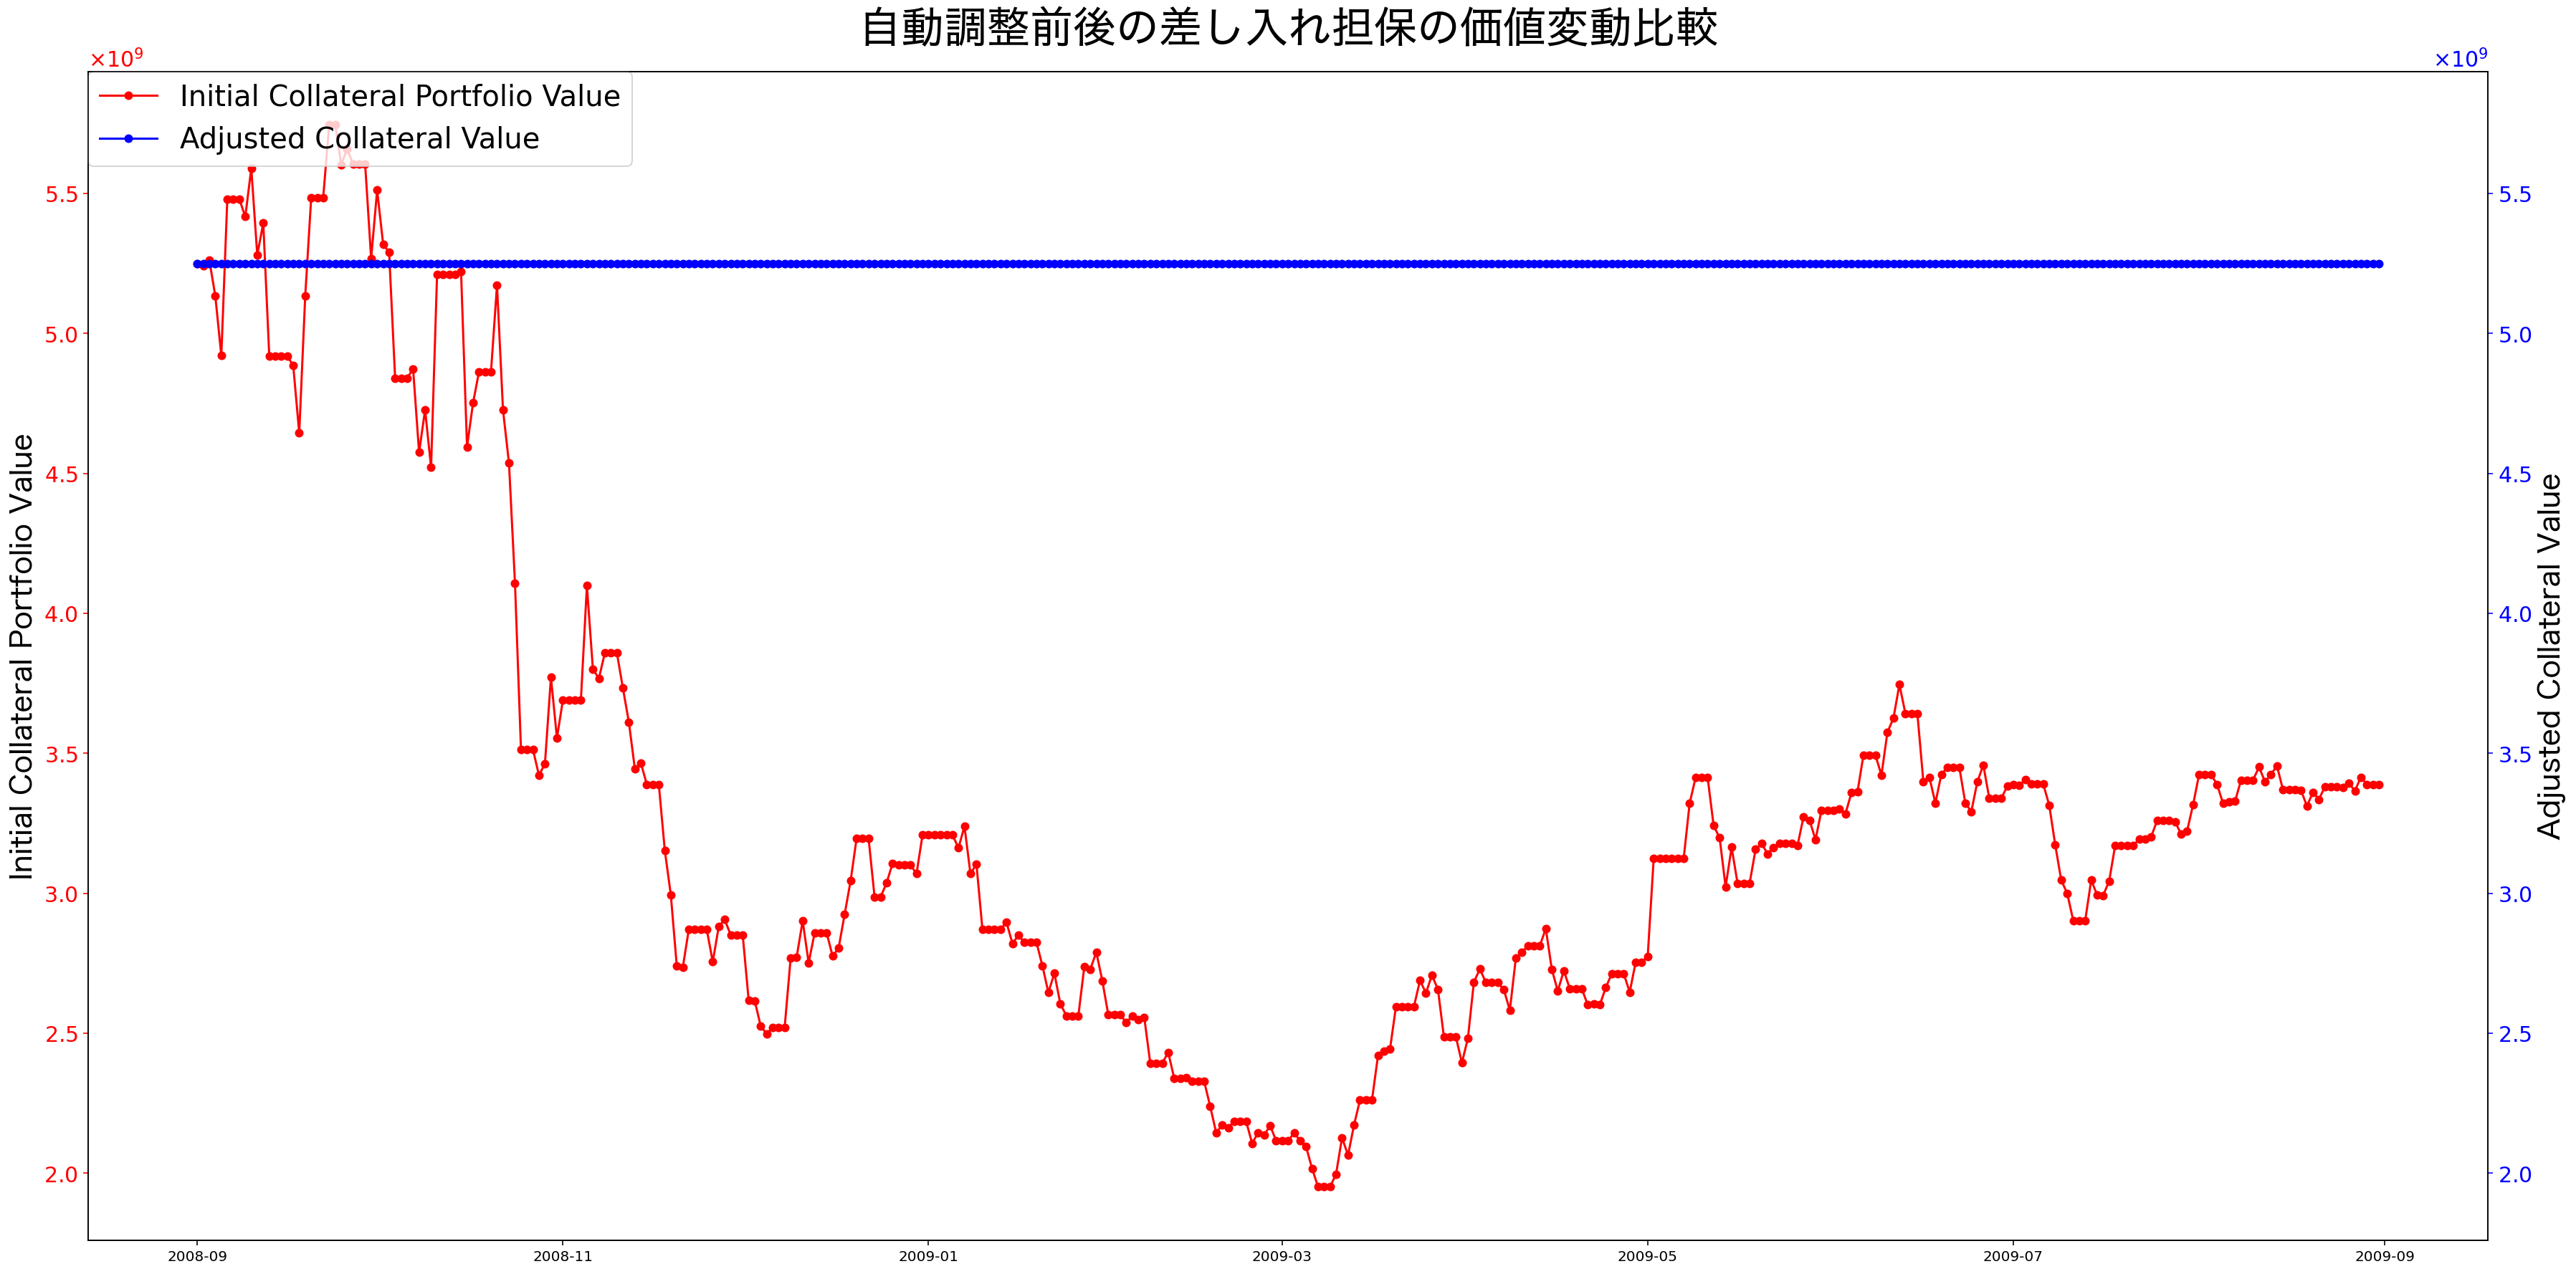

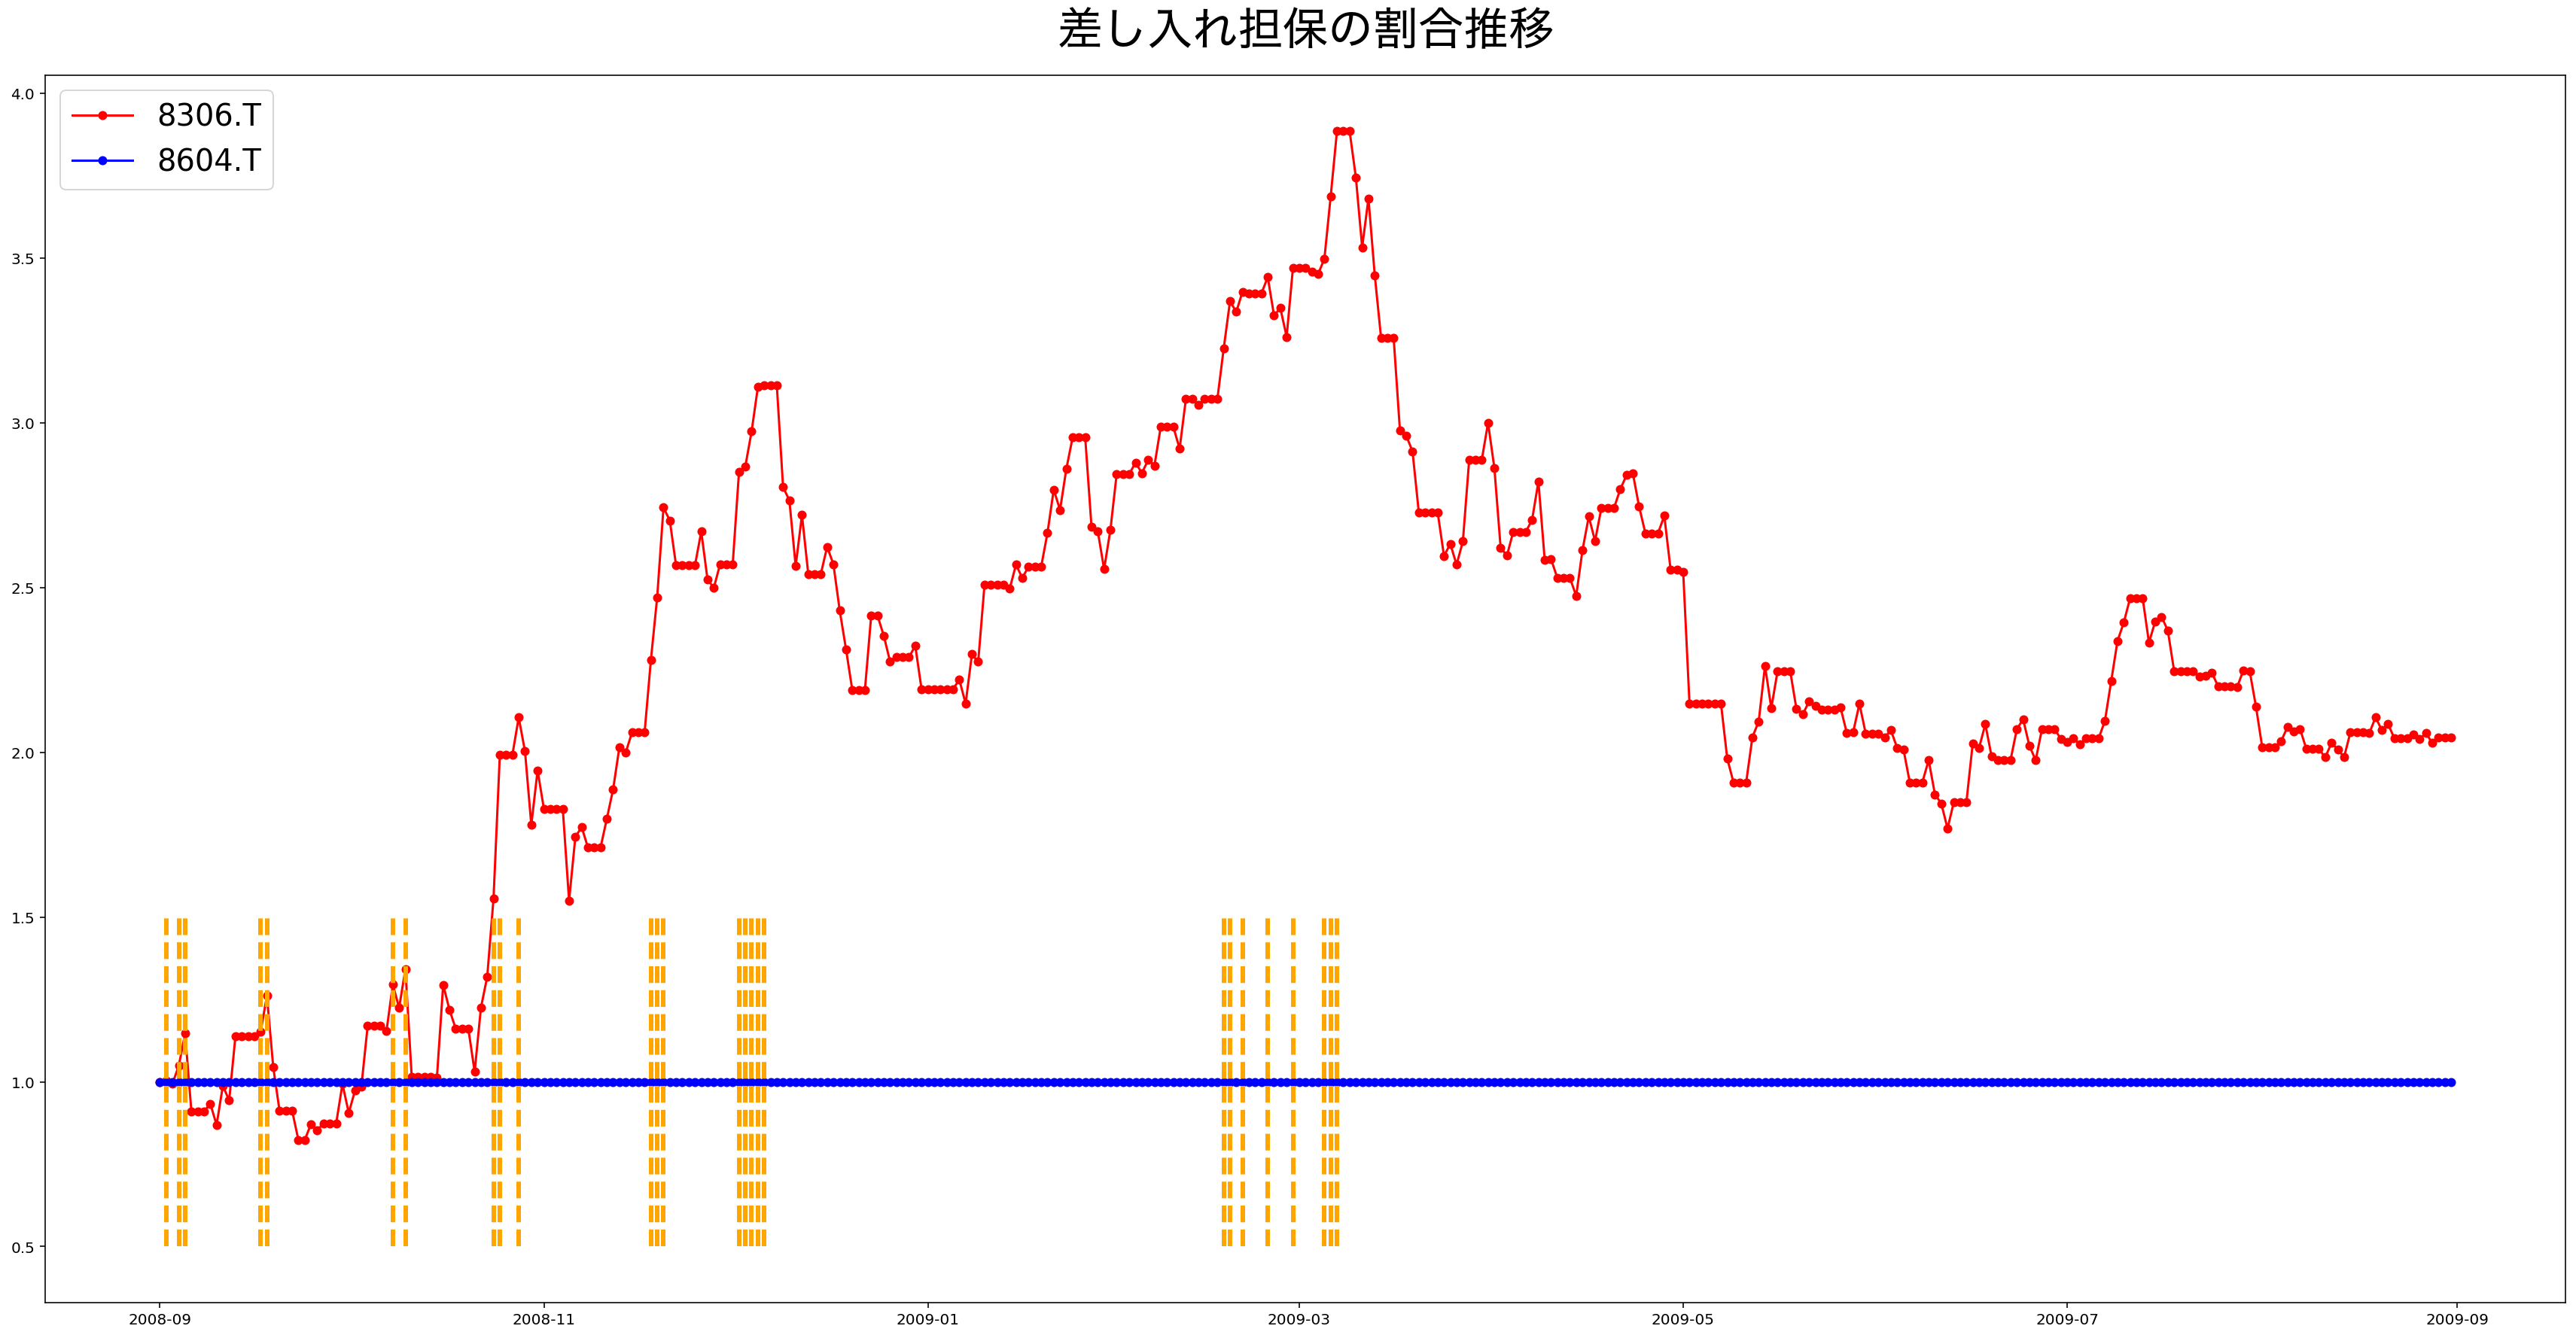

In [21]:
visualizer_1 = LogVisualizer(logs_1)
visualizer_1.compare_collateral_portfolio()
collateral_percentages_1 = visualizer_1.calc_collateral_percentage()
print(collateral_percentages_1)

## model2
ベースモデル（複数トークン価格調整、マージンコール閾値設定なし）

In [22]:
simulator_2 = ExecuteAutoAdjustmentTransactionMulti(borrower_portfolio_down, lender_portfolio_jpy, start_date, end_date,  options=options_2)
print('Start simulation model2...')
%time logs_2 = simulator_2.execute()
print("End simulation model2!!!")

("JCT portfolio: {'8306.T': {'num': 3000000, 'is_usd': False, 'priority': 1}, "
 "'8604.T': {'num': 7000000, 'is_usd': False, 'priority': 0}}")
"ST portfolio: {'JPY': {'num': 5000000000, 'is_usd': False, 'priority': 1}}"
2008-09-01: Price updating...
JPY: 1.0
2008-09-01: Price updating...
8306.T: 824.0
8604.T: 1423.0
"8306.T: {'num': 3000000, 'is_usd': False, 'priority': 1, 'price': 824.0}"
"8604.T: {'num': 7000000, 'is_usd': False, 'priority': 0, 'price': 1423.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
Transaction is created.
{'additional_issue': [False],
 'collateral_portfolio': [{'8306.T': {'is_usd': False,
                                      'num': 3000000,
                                      'price': 824.0,
                                      'priority': 1},
                           '8604.T': {'is_usd': False,
                                      'num': 1952214,
                                      'price': 1423.0,
                             

2008-09-14: Price updating...
JPY: 1.0
2008-09-14: Price updating...
8306.T: 792.0
8604.T: 1303.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 2205680, 'is_usd': False, 'price': 1303.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-09-15
2008-09-15: Price updating...
JPY: 1.0
2008-09-15: Price updating...
8306.T: 792.0
8604.T: 1303.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 792.0}"
"8604.T: {'num': 4794321, 'is_usd': False, 'priority': 0, 'price': 1303.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-0

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-01
2008-10-01: Price updating...
JPY: 1.0
2008-10-01: Price updating...
8306.T: 923.0
8604.T: 1405.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 1938915, 'is_usd': False, 'price': 1405.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-02
2008-10-02: Price updating...
JPY: 1.0
2008-10-02: Price updating...
8306.T: 896.0
8604.T: 1348.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 896.0}"
"8604.T: {'num': 5234164, 'is_usd': False, 'priority': 0, 'price': 1348.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@

2008-10-17: Price updating...
JPY: 1.0
2008-10-17: Price updating...
8306.T: 760.0
8604.T: 1266.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 2491359, 'is_usd': False, 'price': 1266.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-18
2008-10-18: Price updating...
JPY: 1.0
2008-10-18: Price updating...
8306.T: 800.0
8604.T: 1262.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 2345971, 'is_usd': False, 'price': 1262.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-19
2008-10-19: Price updating...
JPY: 1.0
2008-10-19: Price updatin

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-11-03
2008-11-03: Price updating...
JPY: 1.0
2008-11-03: Price updating...
8306.T: 627.0
8604.T: 927.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 3634305, 'is_usd': False, 'price': 927.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-11-04
2008-11-04: Price updating...
JPY: 1.0
2008-11-04: Price updating...
8306.T: 627.0
8604.T: 927.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 627.0}"
"8604.T: {'num': 3365696, 'is_usd': False, 'priority': 0, 'price': 927.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@

2008-11-19: Price updating...
JPY: 1.0
2008-11-19: Price updating...
8306.T: 511.0
8604.T: 749.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 511.0}"
"8604.T: {'num': 2345360, 'is_usd': False, 'priority': 0, 'price': 749.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-11-20
2008-11-20: Price updating...
JPY: 1.0
2008-11-20: Price updating...
8306.T: 480.0
8604.T: 666.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 480.0}"
"8604.T: {'num': 2037383, 'is_usd': False, 'priority': 0, 'price': 666.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@

8306.T: 435.0
8604.T: 611.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 6592845, 'is_usd': False, 'price': 611.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-06
2008-12-06: Price updating...
JPY: 1.0
2008-12-06: Price updating...
8306.T: 430.0
8604.T: 631.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 6456628, 'is_usd': False, 'price': 631.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-07
2008-12-07: Price updating...
JPY: 1.0
2008-12-07: Price updating...
8306.T: 430.0
8604.T: 631.0
from Borrower(A) to Lender(B)
"8306.T: {

2008-12-22: Price updating...
JPY: 1.0
2008-12-22: Price updating...
8306.T: 576.0
8604.T: 752.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 4683511, 'is_usd': False, 'price': 752.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-23
2008-12-23: Price updating...
JPY: 1.0
2008-12-23: Price updating...
8306.T: 533.0
8604.T: 711.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 533.0}"
"8604.T: {'num': 2316490, 'is_usd': False, 'priority': 0, 'price': 711.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-24

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-08
2009-01-08: Price updating...
JPY: 1.0
2009-01-08: Price updating...
8306.T: 560.0
8604.T: 712.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 560.0}"
"8604.T: {'num': 2409449, 'is_usd': False, 'priority': 0, 'price': 712.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-09
2009-01-09: Price updating...
JPY: 1.0
2009-01-09: Price updating...
8306.T: 561.0
8604.T: 728.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 5014045, 'is_usd': False, 'price': 728.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@

2009-01-24: Price updating...
JPY: 1.0
2009-01-24: Price updating...
8306.T: 458.0
8604.T: 609.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 458.0}"
"8604.T: {'num': 683168, 'is_usd': False, 'priority': 0, 'price': 609.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-25
2009-01-25: Price updating...
JPY: 1.0
2009-01-25: Price updating...
8306.T: 458.0
8604.T: 609.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 6364533, 'is_usd': False, 'price': 609.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-26


OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-02-10
2009-02-10: Price updating...
JPY: 1.0
2009-02-10: Price updating...
8306.T: 489.0
8604.T: 494.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 489.0}"
"8604.T: {'num': 0, 'is_usd': False, 'priority': 0, 'price': 494.0}"
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-02-11
2009-02-11: Price updating...
JPY: 1.0
2009-02-11: Price updating...
8306.T: 468.0
8604.T: 479.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 468.0}"
"8604.T: {'num': 0, 'is_usd': False, 'priority': 0, 'price': 479.0}"
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-02-28
2009-02-28: Price updating...
JPY: 1.0
2009-02-28: Price updating...
8306.T: 423.0
8604.T: 434.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 423.0}"
"8604.T: {'num': 0, 'is_usd': False, 'priority': 0, 'price': 434.0}"
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-03-01
2009-03-01: Price updating...
JPY: 1.0
2009-03-01: Price updating...
8306.T: 423.0
8604.T: 434.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 423.0}"
"8604.T: {'num': 0, 'is_usd': False, 'priority': 0, 'price': 434.0}"
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-03-18
2009-03-18: Price updating...
JPY: 1.0
2009-03-18: Price updating...
8306.T: 478.0
8604.T: 514.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 478.0}"
"8604.T: {'num': 0, 'is_usd': False, 'priority': 0, 'price': 514.0}"
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-03-19
2009-03-19: Price updating...
JPY: 1.0
2009-03-19: Price updating...
8306.T: 489.0
8604.T: 500.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 489.0}"
"8604.T: {'num': 0, 'is_usd': False, 'priority': 0, 'price': 500.0}"
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-04-04: Price updating...
JPY: 1.0
2009-04-04: Price updating...
8306.T: 513.0
8604.T: 585.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 513.0}"
"8604.T: {'num': 776272, 'is_usd': False, 'priority': 0, 'price': 585.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-05
2009-04-05: Price updating...
JPY: 1.0
2009-04-05: Price updating...
8306.T: 513.0
8604.T: 585.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 6343590, 'is_usd': False, 'price': 585.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-06


OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-21
2009-04-21: Price updating...
JPY: 1.0
2009-04-21: Price updating...
8306.T: 491.0
8604.T: 578.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 491.0}"
"8604.T: {'num': 730000, 'is_usd': False, 'priority': 0, 'price': 578.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-22
2009-04-22: Price updating...
JPY: 1.0
2009-04-22: Price updating...
8306.T: 479.0
8604.T: 598.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 6534603, 'is_usd': False, 'price': 598.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@


8306.T: 617.0
8604.T: 652.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 617.0}"
"8604.T: {'num': 1786810, 'is_usd': False, 'priority': 0, 'price': 652.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-08
2009-05-08: Price updating...
JPY: 1.0
2009-05-08: Price updating...
8306.T: 655.0
8604.T: 695.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 5213191, 'is_usd': False, 'price': 695.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-09
2009-05-09: Price updating...
JPY: 1.0
2009-05-09: Price updating...

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-24
2009-05-24: Price updating...
JPY: 1.0
2009-05-24: Price updating...
8306.T: 611.0
8604.T: 689.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 611.0}"
"8604.T: {'num': 2040639, 'is_usd': False, 'priority': 0, 'price': 689.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-25
2009-05-25: Price updating...
JPY: 1.0
2009-05-25: Price updating...
8306.T: 611.0
8604.T: 689.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 4959362, 'is_usd': False, 'price': 689.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@

2009-06-09: Price updating...
JPY: 1.0
2009-06-09: Price updating...
8306.T: 624.0
8604.T: 794.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 624.0}"
"8604.T: {'num': 2852500, 'is_usd': False, 'priority': 0, 'price': 794.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-06-10
2009-06-10: Price updating...
JPY: 1.0
2009-06-10: Price updating...
8306.T: 640.0
8604.T: 848.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 4254409, 'is_usd': False, 'price': 848.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-06-11

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-06-26
2009-06-26: Price updating...
JPY: 1.0
2009-06-26: Price updating...
8306.T: 612.0
8604.T: 831.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 4235511, 'is_usd': False, 'price': 831.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-06-27
2009-06-27: Price updating...
JPY: 1.0
2009-06-27: Price updating...
8306.T: 595.0
8604.T: 796.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 595.0}"
"8604.T: {'num': 2891697, 'is_usd': False, 'priority': 0, 'price': 796.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@

2009-07-12: Price updating...
JPY: 1.0
2009-07-12: Price updating...
8306.T: 533.0
8604.T: 668.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 5465569, 'is_usd': False, 'price': 668.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-07-13
2009-07-13: Price updating...
JPY: 1.0
2009-07-13: Price updating...
8306.T: 533.0
8604.T: 668.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 533.0}"
"8604.T: {'num': 1534432, 'is_usd': False, 'priority': 0, 'price': 668.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-07-14

2009-07-29: Price updating...
JPY: 1.0
2009-07-29: Price updating...
8306.T: 544.0
8604.T: 809.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 544.0}"
"8604.T: {'num': 2601226, 'is_usd': False, 'priority': 0, 'price': 809.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-07-30
2009-07-30: Price updating...
JPY: 1.0
2009-07-30: Price updating...
8306.T: 542.0
8604.T: 818.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 4472188, 'is_usd': False, 'price': 818.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-07-31

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-15
2009-08-15: Price updating...
JPY: 1.0
2009-08-15: Price updating...
8306.T: 591.0
8604.T: 818.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 591.0}"
"8604.T: {'num': 2903226, 'is_usd': False, 'priority': 0, 'price': 818.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-16
2009-08-16: Price updating...
JPY: 1.0
2009-08-16: Price updating...
8306.T: 591.0
8604.T: 818.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 4250612, 'is_usd': False, 'price': 818.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@

2009-08-31: Price updating...
JPY: 1.0
2009-08-31: Price updating...
8306.T: 594.0
8604.T: 823.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 594.0}"
"8604.T: {'num': 2786149, 'is_usd': False, 'priority': 0, 'price': 823.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Finished!!!!
CPU times: user 3min 47s, sys: 13.5 s, total: 4min
Wall time: 22min 17s
End simulation model2!!!


Log Visualizer initialized.
{'8306.T': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

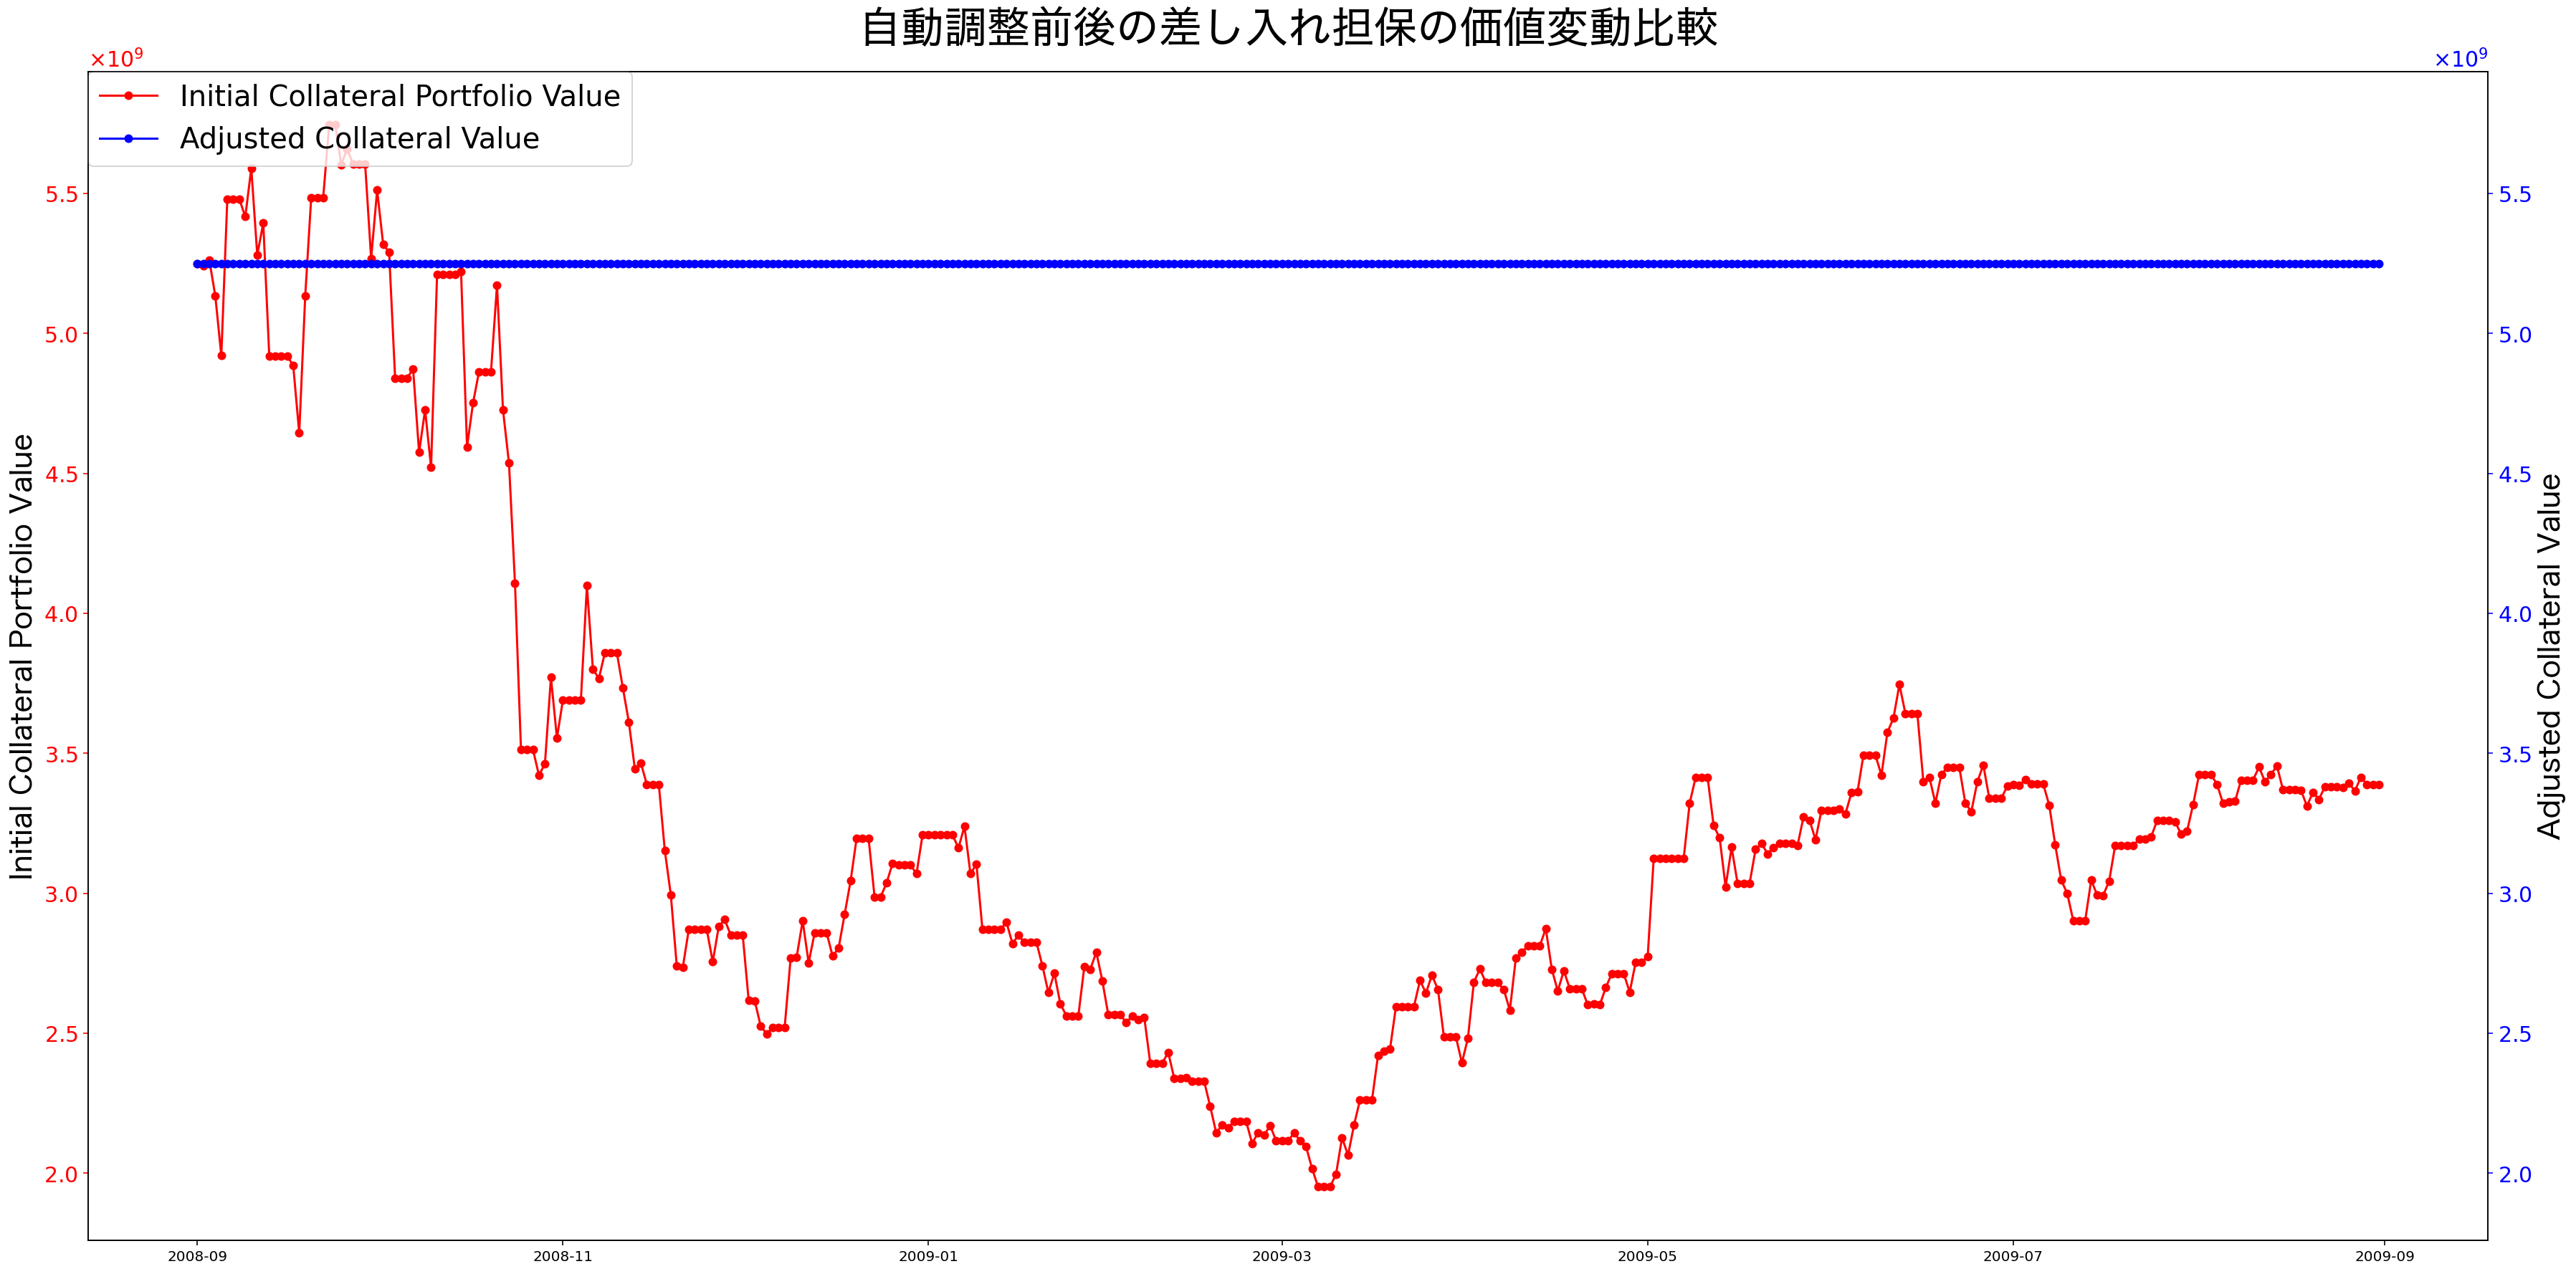

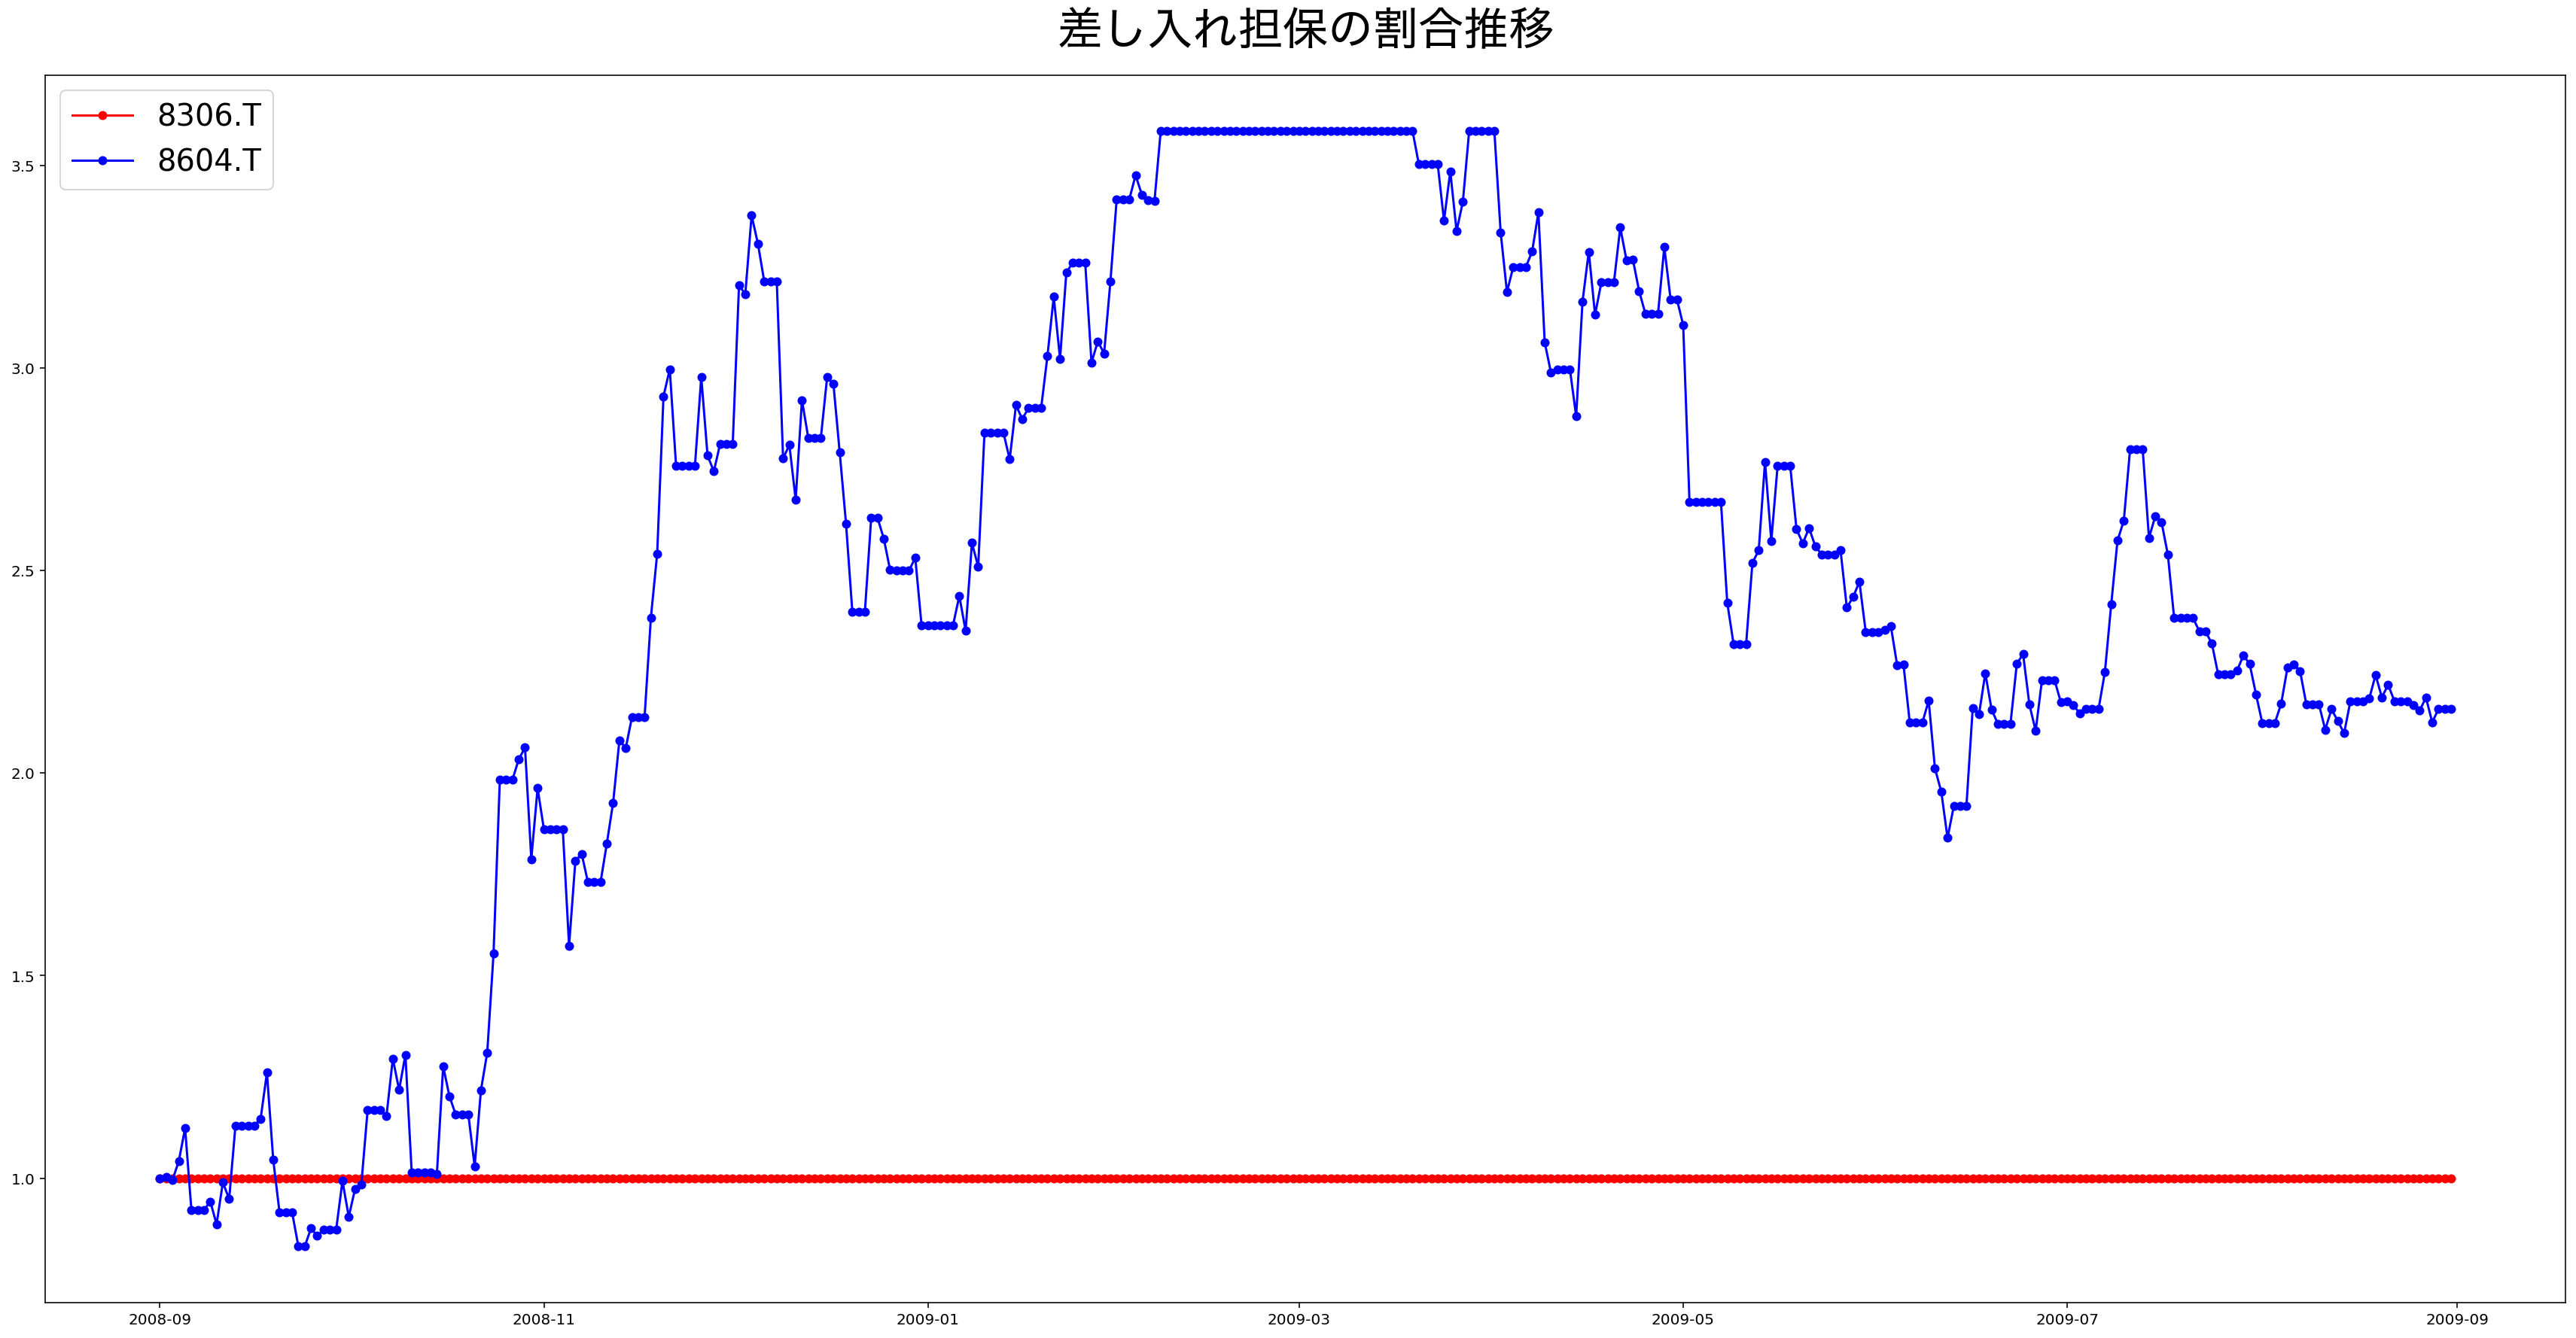

In [23]:
visualizer_2 = LogVisualizer(logs_2)
visualizer_2.compare_collateral_portfolio()
collateral_percentages_2 = visualizer_2.calc_collateral_percentage()
print(collateral_percentages_2)

## model3
ベースモデル（単一トークン価格調整、マージンコール閾値設定あり）

In [24]:
simulator_3 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy, start_date, end_date,  options=options_3)
print('Start simulation model3...')
%time logs_3 = simulator_3.execute()
print("End simulation model3!!!")

("JCT portfolio: {'8306.T': {'num': 3000000, 'is_usd': False, 'priority': 1}, "
 "'8604.T': {'num': 7000000, 'is_usd': False, 'priority': 0}}")
"ST portfolio: {'JPY': {'num': 5000000000, 'is_usd': False, 'priority': 1}}"
2008-09-01: Price updating...
JPY: 1.0
2008-09-01: Price updating...
8306.T: 824.0
8604.T: 1423.0
"8306.T: {'num': 3000000, 'is_usd': False, 'priority': 1, 'price': 824.0}"
"8604.T: {'num': 7000000, 'is_usd': False, 'priority': 0, 'price': 1423.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
Transaction is created.
{'additional_issue': [False],
 'collateral_portfolio': [{'8306.T': {'is_usd': False,
                                      'num': 3000000,
                                      'price': 824.0,
                                      'priority': 1},
                           '8604.T': {'is_usd': False,
                                      'num': 1952214,
                                      'price': 1423.0,
                             

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-09-19
2008-09-19: Price updating...
JPY: 1.0
2008-09-19: Price updating...
8306.T: 862.0
8604.T: 1305.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-09-20
2008-09-20: Price updating...
JPY: 1.0
2008-09-20: Price updating...
8306.T: 898.0
8604.T: 1430.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

2008-10-11: Price updating...
JPY: 1.0
2008-10-11: Price updating...
8306.T: 810.0
8604.T: 1425.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-12
2008-10-12: Price updating...
JPY: 1.0
2008-10-12: Price updating...
8306.T: 810.0
8604.T: 1425.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-13
2008-10-13: Price updating...
JPY: 1.0
2008-10-13: Price updating...
8306.T: 810.0
8604.T: 1425.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-11-02
2008-11-02: Price updating...
JPY: 1.0
2008-11-02: Price updating...
8306.T: 627.0
8604.T: 927.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-11-03
2008-11-03: Price updating...
JPY: 1.0
2008-11-03: Price updating...
8306.T: 627.0
8604.T: 927.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-11-04
2008-11-04: Price updating...
JPY: 1.0
2008-11-04: Price updating...
8306.T: 627.0
8604.T: 9

2008-11-23: Price updating...
JPY: 1.0
2008-11-23: Price updating...
8306.T: 506.0
8604.T: 693.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-11-24
2008-11-24: Price updating...
JPY: 1.0
2008-11-24: Price updating...
8306.T: 506.0
8604.T: 693.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-11-25
2008-11-25: Price updating...
JPY: 1.0
2008-11-25: Price updating...
8306.T: 506.0
8604.T: 693.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-16
2008-12-16: Price updating...
JPY: 1.0
2008-12-16: Price updating...
8306.T: 508.0
8604.T: 641.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-17
2008-12-17: Price updating...
JPY: 1.0
2008-12-17: Price updating...
8306.T: 519.0
8604.T: 639.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-18
2008-12-18: Price updating...
JPY: 1.0
2008-12-18: Price updating...
8306.T: 542.0
8604.T: 6

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-08
2009-01-08: Price updating...
JPY: 1.0
2009-01-08: Price updating...
8306.T: 560.0
8604.T: 712.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-09
2009-01-09: Price updating...
JPY: 1.0
2009-01-09: Price updating...
8306.T: 561.0
8604.T: 728.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-10
2009-01-10: Price updating...
JPY: 1.0
2009-01-10: Price updating...
8306.T: 526.0
8604.T: 6

2009-01-30: Price updating...
JPY: 1.0
2009-01-30: Price updating...
8306.T: 510.0
8604.T: 593.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-31
2009-01-31: Price updating...
JPY: 1.0
2009-01-31: Price updating...
8306.T: 485.0
8604.T: 569.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-02-01
2009-02-01: Price updating...
JPY: 1.0
2009-02-01: Price updating...
8306.T: 485.0
8604.T: 569.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-02-22: Price updating...
JPY: 1.0
2009-02-22: Price updating...
8306.T: 427.0
8604.T: 463.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-02-23
2009-02-23: Price updating...
JPY: 1.0
2009-02-23: Price updating...
8306.T: 427.0
8604.T: 463.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-02-24
2009-02-24: Price updating...
JPY: 1.0
2009-02-24: Price updating...
8306.T: 429.0
8604.T: 420.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-03-17: Price updating...
JPY: 1.0
2009-03-17: Price updating...
8306.T: 477.0
8604.T: 507.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-03-18
2009-03-18: Price updating...
JPY: 1.0
2009-03-18: Price updating...
8306.T: 478.0
8604.T: 514.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-03-19
2009-03-19: Price updating...
JPY: 1.0
2009-03-19: Price updating...
8306.T: 489.0
8604.T: 500.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-09
2009-04-09: Price updating...
JPY: 1.0
2009-04-09: Price updating...
8306.T: 522.0
8604.T: 616.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-10
2009-04-10: Price updating...
JPY: 1.0
2009-04-10: Price updating...
8306.T: 517.0
8604.T: 634.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-11
2009-04-11: Price updating...

2009-05-01: Price updating...
JPY: 1.0
2009-05-01: Price updating...
8306.T: 533.0
8604.T: 602.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-02
2009-05-02: Price updating...
JPY: 1.0
2009-05-02: Price updating...
8306.T: 617.0
8604.T: 652.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-03
2009-05-03: Price updating...
JPY: 1.0
2009-05-03: Price updating...
8306.T: 617.0
8604.T: 652.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-24
2009-05-24: Price updating...
JPY: 1.0
2009-05-24: Price updating...
8306.T: 611.0
8604.T: 689.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-25
2009-05-25: Price updating...
JPY: 1.0
2009-05-25: Price updating...
8306.T: 611.0
8604.T: 689.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-26
2009-05-26: Price updating...
JPY: 1.0
2009-05-26: Price updating...
8306.T: 610.0
8604.T: 6

8306.T: 631.0
8604.T: 896.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-06-16
2009-06-16: Price updating...
JPY: 1.0
2009-06-16: Price updating...
8306.T: 601.0
8604.T: 817.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-06-17
2009-06-17: Price updating...
JPY: 1.0
2009-06-17: Price updating...
8306.T: 604.0
8604.T: 821.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-07-08: Price updating...
8306.T: 569.0
8604.T: 751.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-07-09
2009-07-09: Price updating...
JPY: 1.0
2009-07-09: Price updating...
8306.T: 549.0
8604.T: 717.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-07-10
2009-07-10: Price updating...
JPY: 1.0
2009-07-10: Price updating...
8306.T: 538.0
8604.T: 710.0
adjust with a single token
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@

2009-07-31: Price updating...
JPY: 1.0
2009-07-31: Price updating...
8306.T: 566.0
8604.T: 829.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-01
2009-08-01: Price updating...
JPY: 1.0
2009-08-01: Price updating...
8306.T: 600.0
8604.T: 832.0
adjust with a single token
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-02
2009-08-02: Price updating...
JPY: 1.0
2009-08-02: Price updating...
8306.T: 600.0
8604.T: 832.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-08-23: Price updating...
JPY: 1.0
2009-08-23: Price updating...
8306.T: 598.0
8604.T: 813.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-24
2009-08-24: Price updating...
JPY: 1.0
2009-08-24: Price updating...
8306.T: 598.0
8604.T: 813.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-25
2009-08-25: Price updating...
JPY: 1.0
2009-08-25: Price updating...
8306.T: 592.0
8604.T: 821.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@

Log Visualizer initialized.
{'8306.T': [1.0, 1.0, 1.0, 1.0, 1.1463873333333334, 0.9096966666666667, 0.9096966666666667, 0.9096966666666667, 0.9096966666666667, 0.9096966666666667, 0.9096966666666667, 0.9096966666666667, 1.1390006666666668, 1.1390006666666668, 1.1390006666666668, 1.1390006666666668, 1.1390006666666668, 1.2612823333333334, 1.0449963333333334, 0.9125216666666667, 0.9125216666666667, 0.9125216666666667, 0.9125216666666667, 0.9125216666666667, 0.9125216666666667, 0.9125216666666667, 0.9125216666666667, 0.9125216666666667, 0.9125216666666667, 0.9125216666666667, 0.9125216666666667, 0.9125216666666667, 0.9125216666666667, 1.1692733333333334, 1.1692733333333334, 1.1692733333333334, 1.1692733333333334, 1.29487, 1.29487, 1.29487, 1.0156766666666666, 1.0156766666666666, 1.0156766666666666, 1.0156766666666666, 1.0156766666666666, 1.294674, 1.294674, 1.1609606666666668, 1.1609606666666668, 1.1609606666666668, 1.0303383333333334, 1.225182, 1.225182, 1.5570593333333334, 1.992681, 1.9

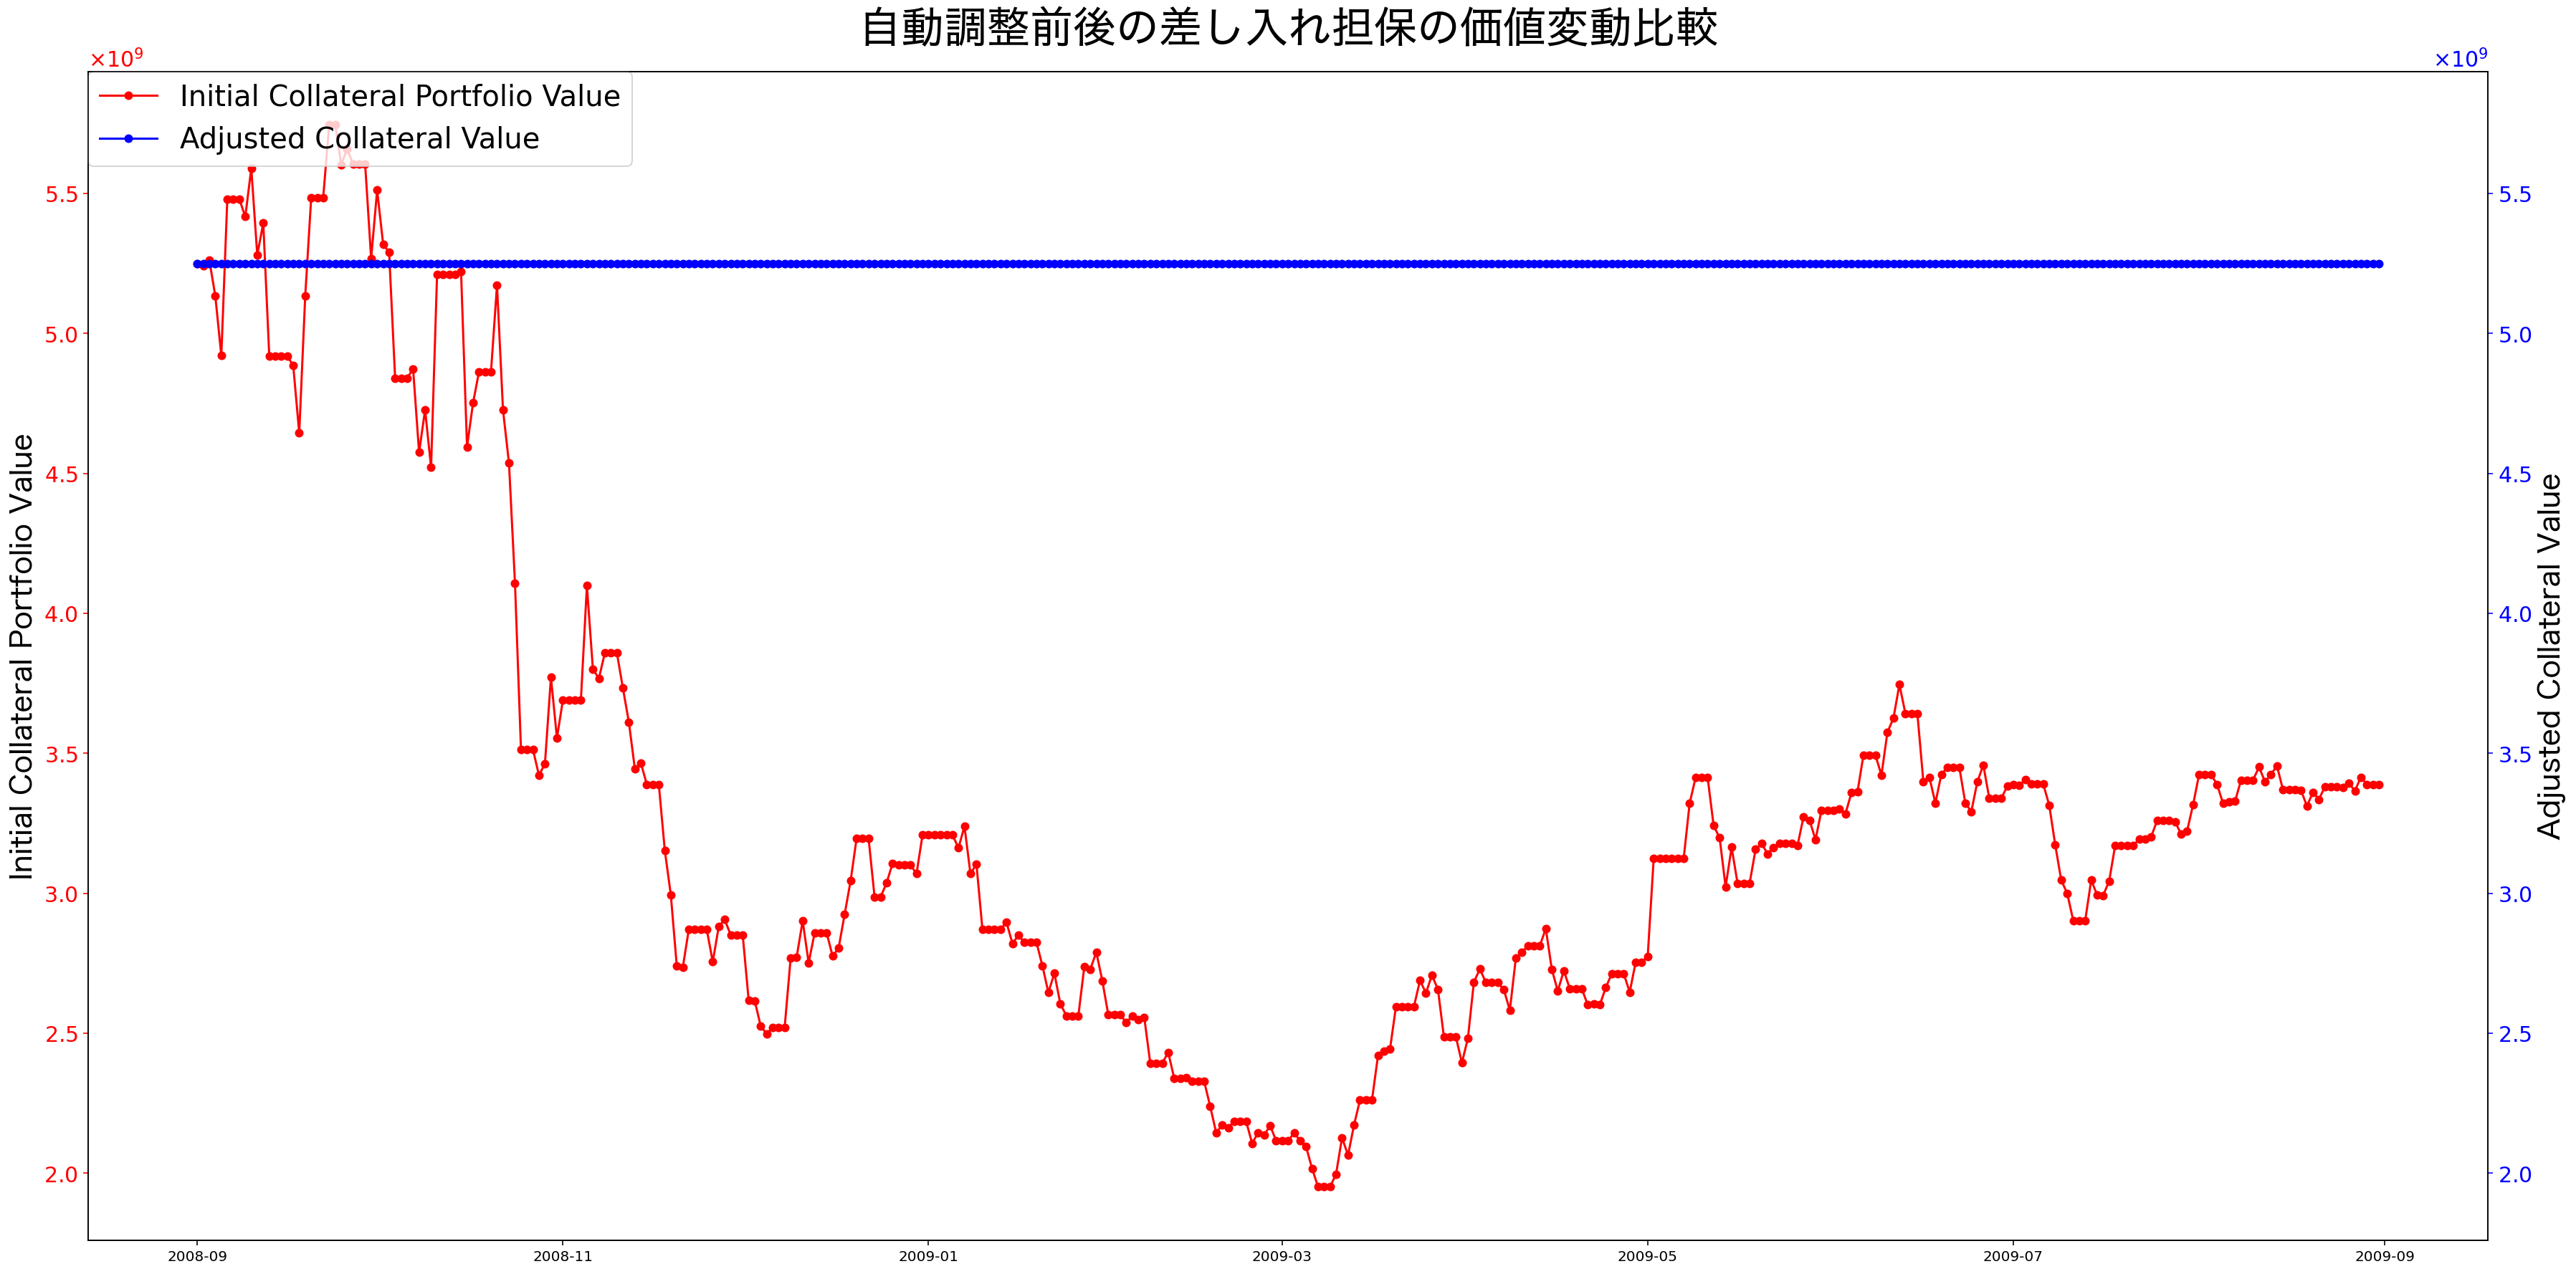

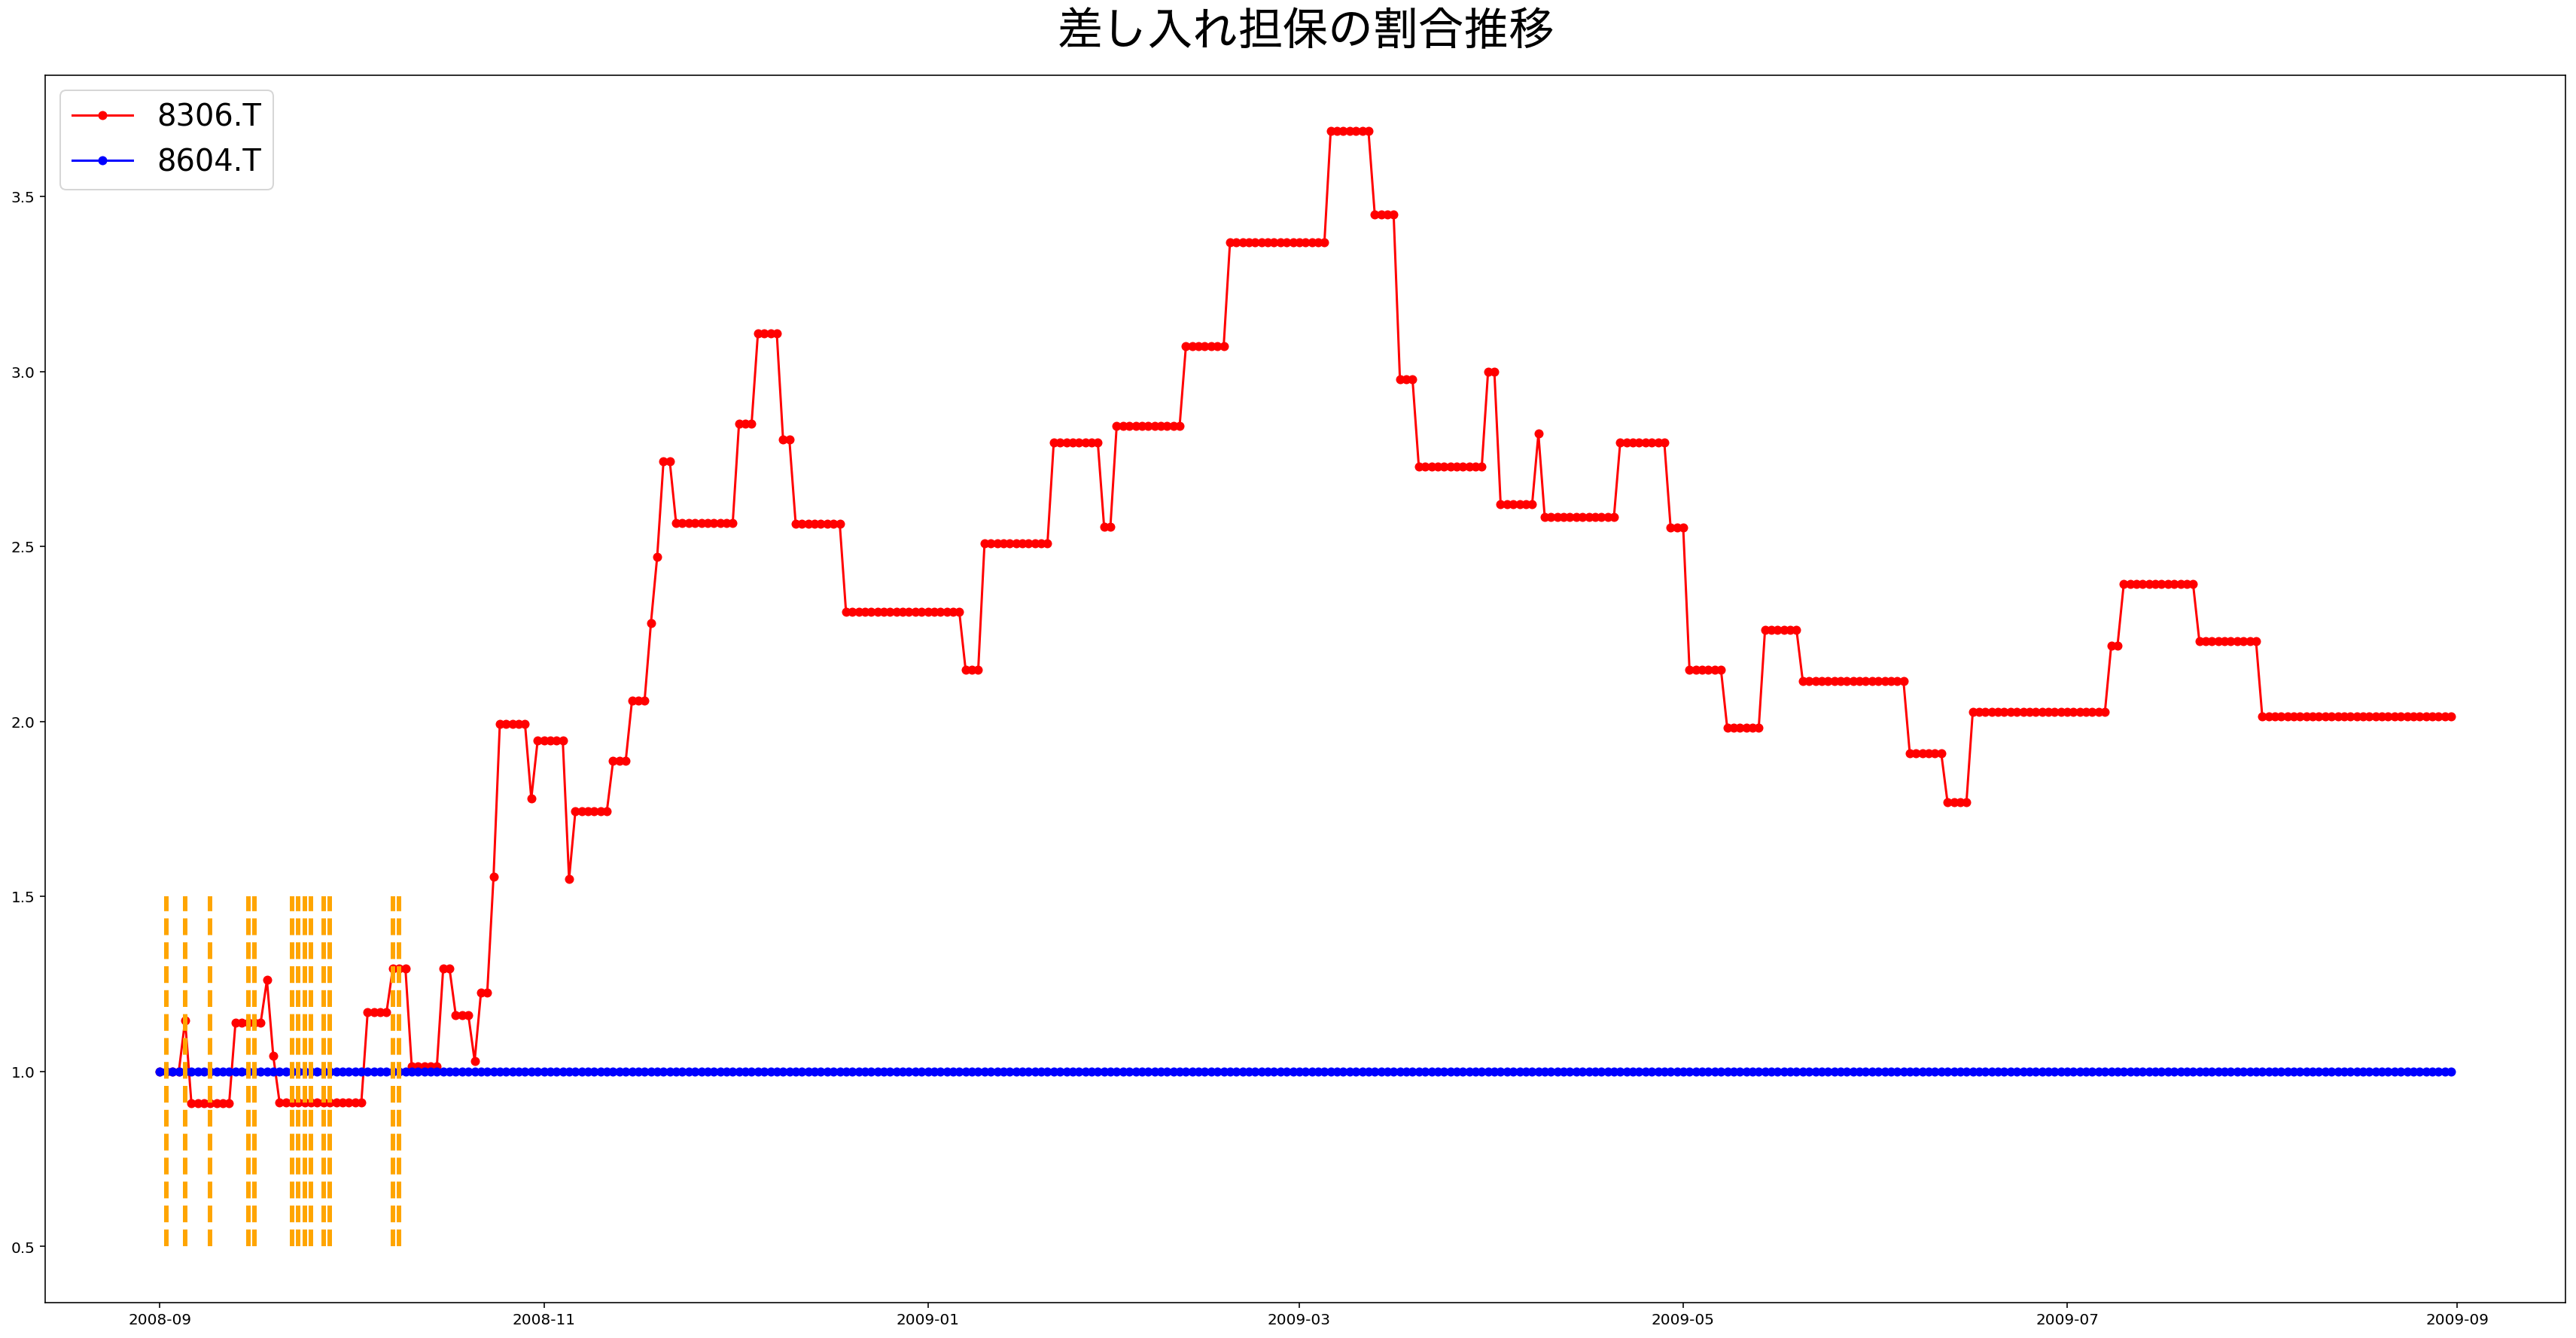

In [25]:
visualizer_3 = LogVisualizer(logs_3)
visualizer_3.compare_collateral_portfolio()
collateral_percentages_3 = visualizer_3.calc_collateral_percentage()
print(collateral_percentages_3)

## model4
ベースモデル（複数トークン価格調整、マージンコール閾値設定あり）

In [28]:
simulator_4 = ExecuteAutoAdjustmentTransactionMulti(borrower_portfolio_down, lender_portfolio_jpy, start_date, end_date,  options=options_4)
print('Start simulation model4...')
%time logs_4 = simulator_4.execute()
print("End simulation model4!!!")

("JCT portfolio: {'8306.T': {'num': 3000000, 'is_usd': False, 'priority': 1}, "
 "'8604.T': {'num': 7000000, 'is_usd': False, 'priority': 0}}")
"ST portfolio: {'JPY': {'num': 5000000000, 'is_usd': False, 'priority': 1}}"
2008-09-01: Price updating...
JPY: 1.0
2008-09-01: Price updating...
8306.T: 824.0
8604.T: 1423.0
"8306.T: {'num': 3000000, 'is_usd': False, 'priority': 1, 'price': 824.0}"
"8604.T: {'num': 7000000, 'is_usd': False, 'priority': 0, 'price': 1423.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
Transaction is created.
{'additional_issue': [False],
 'collateral_portfolio': [{'8306.T': {'is_usd': False,
                                      'num': 3000000,
                                      'price': 824.0,
                                      'priority': 1},
                           '8604.T': {'is_usd': False,
                                      'num': 1952214,
                                      'price': 1423.0,
                             

2008-09-18: Price updating...
JPY: 1.0
2008-09-18: Price updating...
8306.T: 773.0
8604.T: 1191.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 773.0}"
"8604.T: {'num': 4794320, 'is_usd': False, 'priority': 0, 'price': 1191.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-09-19
2008-09-19: Price updating...
JPY: 1.0
2008-09-19: Price updating...
8306.T: 862.0
8604.T: 1305.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 2460958, 'is_usd': False, 'price': 1305.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-0

2008-10-09: Price updating...
JPY: 1.0
2008-10-09: Price updating...
8306.T: 776.0
8604.T: 1229.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-10
2008-10-10: Price updating...
JPY: 1.0
2008-10-10: Price updating...
8306.T: 710.0
8604.T: 1225.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-11
2008-10-11: Price updating...
JPY: 1.0
2008-10-11: Price updating...
8306.T: 810.0
8604.T: 1425.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 2528609, 'is_usd': False, 'price': 1425.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is 

2008-10-29: Price updating...
8306.T: 594.0
8604.T: 861.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-30
2008-10-30: Price updating...
JPY: 1.0
2008-10-30: Price updating...
8306.T: 632.0
8604.T: 961.0
from Lender(B) to Borrower(A)
"8604.T: {'num': 3872788, 'is_usd': False, 'price': 961.0, 'priority': 0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-31
2008-10-31: Price updating...
JPY: 1.0
2008-10-31: Price updating...
8306.T: 598.0
8604.T: 902.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 598.0}"
"8604.T: {'num': 35098

2008-11-19: Price updating...
JPY: 1.0
2008-11-19: Price updating...
8306.T: 511.0
8604.T: 749.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-11-20
2008-11-20: Price updating...
JPY: 1.0
2008-11-20: Price updating...
8306.T: 480.0
8604.T: 666.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 480.0}"
"8604.T: {'num': 2345360, 'is_usd': False, 'priority': 0, 'price': 666.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-11-21
2008-11-21: Price updating...
JPY: 1.0
2008-11-21: Price updating...
8306.T: 492.0
8604.T: 645.0
price diff is

2008-12-11: Price updating...
JPY: 1.0
2008-12-11: Price updating...
8306.T: 500.0
8604.T: 718.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-12
2008-12-12: Price updating...
JPY: 1.0
2008-12-12: Price updating...
8306.T: 484.0
8604.T: 666.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-12-13
2008-12-13: Price updating...
JPY: 1.0
2008-12-13: Price updating...
8306.T: 517.0
8604.T: 670.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-01-02: Price updating...
JPY: 1.0
2009-01-02: Price updating...
8306.T: 571.0
8604.T: 766.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-03
2009-01-03: Price updating...
JPY: 1.0
2009-01-03: Price updating...
8306.T: 571.0
8604.T: 766.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-04
2009-01-04: Price updating...
JPY: 1.0
2009-01-04: Price updating...
8306.T: 571.0
8604.T: 766.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-01-24: Price updating...
JPY: 1.0
2009-01-24: Price updating...
8306.T: 458.0
8604.T: 609.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-25
2009-01-25: Price updating...
JPY: 1.0
2009-01-25: Price updating...
8306.T: 458.0
8604.T: 609.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-01-26
2009-01-26: Price updating...
JPY: 1.0
2009-01-26: Price updating...
8306.T: 458.0
8604.T: 609.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-02-14
2009-02-14: Price updating...
JPY: 1.0
2009-02-14: Price updating...
8306.T: 470.0
8604.T: 470.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 470.0}"
"8604.T: {'num': 0, 'is_usd': False, 'priority': 0, 'price': 470.0}"
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-02-15
2009-02-15: Price updating...
JPY: 1.0
2009-02-15: Price updating...
8306.T: 470.0
8604.T: 470.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 470.0}"
"8604.T: {'num': 0, 'is_usd': False, 'priority': 0, 'price': 470.0}"
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-03-04
2009-03-04: Price updating...
JPY: 1.0
2009-03-04: Price updating...
8306.T: 426.0
8604.T: 430.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 426.0}"
"8604.T: {'num': 0, 'is_usd': False, 'priority': 0, 'price': 430.0}"
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-03-05
2009-03-05: Price updating...
JPY: 1.0
2009-03-05: Price updating...
8306.T: 421.0
8604.T: 426.0
from Borrower(A) to Lender(B)
"8306.T: {'num': 0, 'is_usd': False, 'priority': 1, 'price': 421.0}"
"8604.T: {'num': 0, 'is_usd': False, 'priority': 0, 'price': 426.0}"
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-03-22: Price updating...
JPY: 1.0
2009-03-22: Price updating...
8306.T: 512.0
8604.T: 543.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-03-23
2009-03-23: Price updating...
JPY: 1.0
2009-03-23: Price updating...
8306.T: 512.0
8604.T: 543.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-03-24
2009-03-24: Price updating...
JPY: 1.0
2009-03-24: Price updating...
8306.T: 535.0
8604.T: 555.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-04-13: Price updating...
JPY: 1.0
2009-04-13: Price updating...
8306.T: 531.0
8604.T: 625.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-14
2009-04-14: Price updating...
JPY: 1.0
2009-04-14: Price updating...
8306.T: 537.0
8604.T: 647.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-04-15
2009-04-15: Price updating...
JPY: 1.0
2009-04-15: Price updating...
8306.T: 521.0
8604.T: 597.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-05-05: Price updating...
JPY: 1.0
2009-05-05: Price updating...
8306.T: 617.0
8604.T: 652.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-06
2009-05-06: Price updating...
JPY: 1.0
2009-05-06: Price updating...
8306.T: 617.0
8604.T: 652.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-07
2009-05-07: Price updating...
JPY: 1.0
2009-05-07: Price updating...
8306.T: 617.0
8604.T: 652.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-05-27: Price updating...
JPY: 1.0
2009-05-27: Price updating...
8306.T: 623.0
8604.T: 719.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-28
2009-05-28: Price updating...
JPY: 1.0
2009-05-28: Price updating...
8306.T: 625.0
8604.T: 710.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-05-29
2009-05-29: Price updating...
JPY: 1.0
2009-05-29: Price updating...
8306.T: 598.0
8604.T: 716.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-06-18: Price updating...
JPY: 1.0
2009-06-18: Price updating...
8306.T: 592.0
8604.T: 792.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-06-19
2009-06-19: Price updating...
JPY: 1.0
2009-06-19: Price updating...
8306.T: 616.0
8604.T: 808.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-06-20
2009-06-20: Price updating...
JPY: 1.0
2009-06-20: Price updating...
8306.T: 615.0
8604.T: 822.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-07-11
2009-07-11: Price updating...
JPY: 1.0
2009-07-11: Price updating...
8306.T: 533.0
8604.T: 668.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-07-12
2009-07-12: Price updating...
JPY: 1.0
2009-07-12: Price updating...
8306.T: 533.0
8604.T: 668.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-07-13
2009-07-13: Price updating...
JPY: 1.0
2009-07-13: Price updating...
8306.T: 533.0
8604.T: 6

2009-08-02: Price updating...
JPY: 1.0
2009-08-02: Price updating...
8306.T: 600.0
8604.T: 832.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-03
2009-08-03: Price updating...
JPY: 1.0
2009-08-03: Price updating...
8306.T: 600.0
8604.T: 832.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-04
2009-08-04: Price updating...
JPY: 1.0
2009-08-04: Price updating...
8306.T: 600.0
8604.T: 814.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@

2009-08-25: Price updating...
8306.T: 592.0
8604.T: 821.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-26
2009-08-26: Price updating...
JPY: 1.0
2009-08-26: Price updating...
8306.T: 595.0
8604.T: 824.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2009-08-27
2009-08-27: Price updating...
JPY: 1.0
2009-08-27: Price updating...
8306.T: 593.0
8604.T: 813.0
price diff is so little that auto margin call is cancelled.
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Log Visualizer initialized.
{'8306.T': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

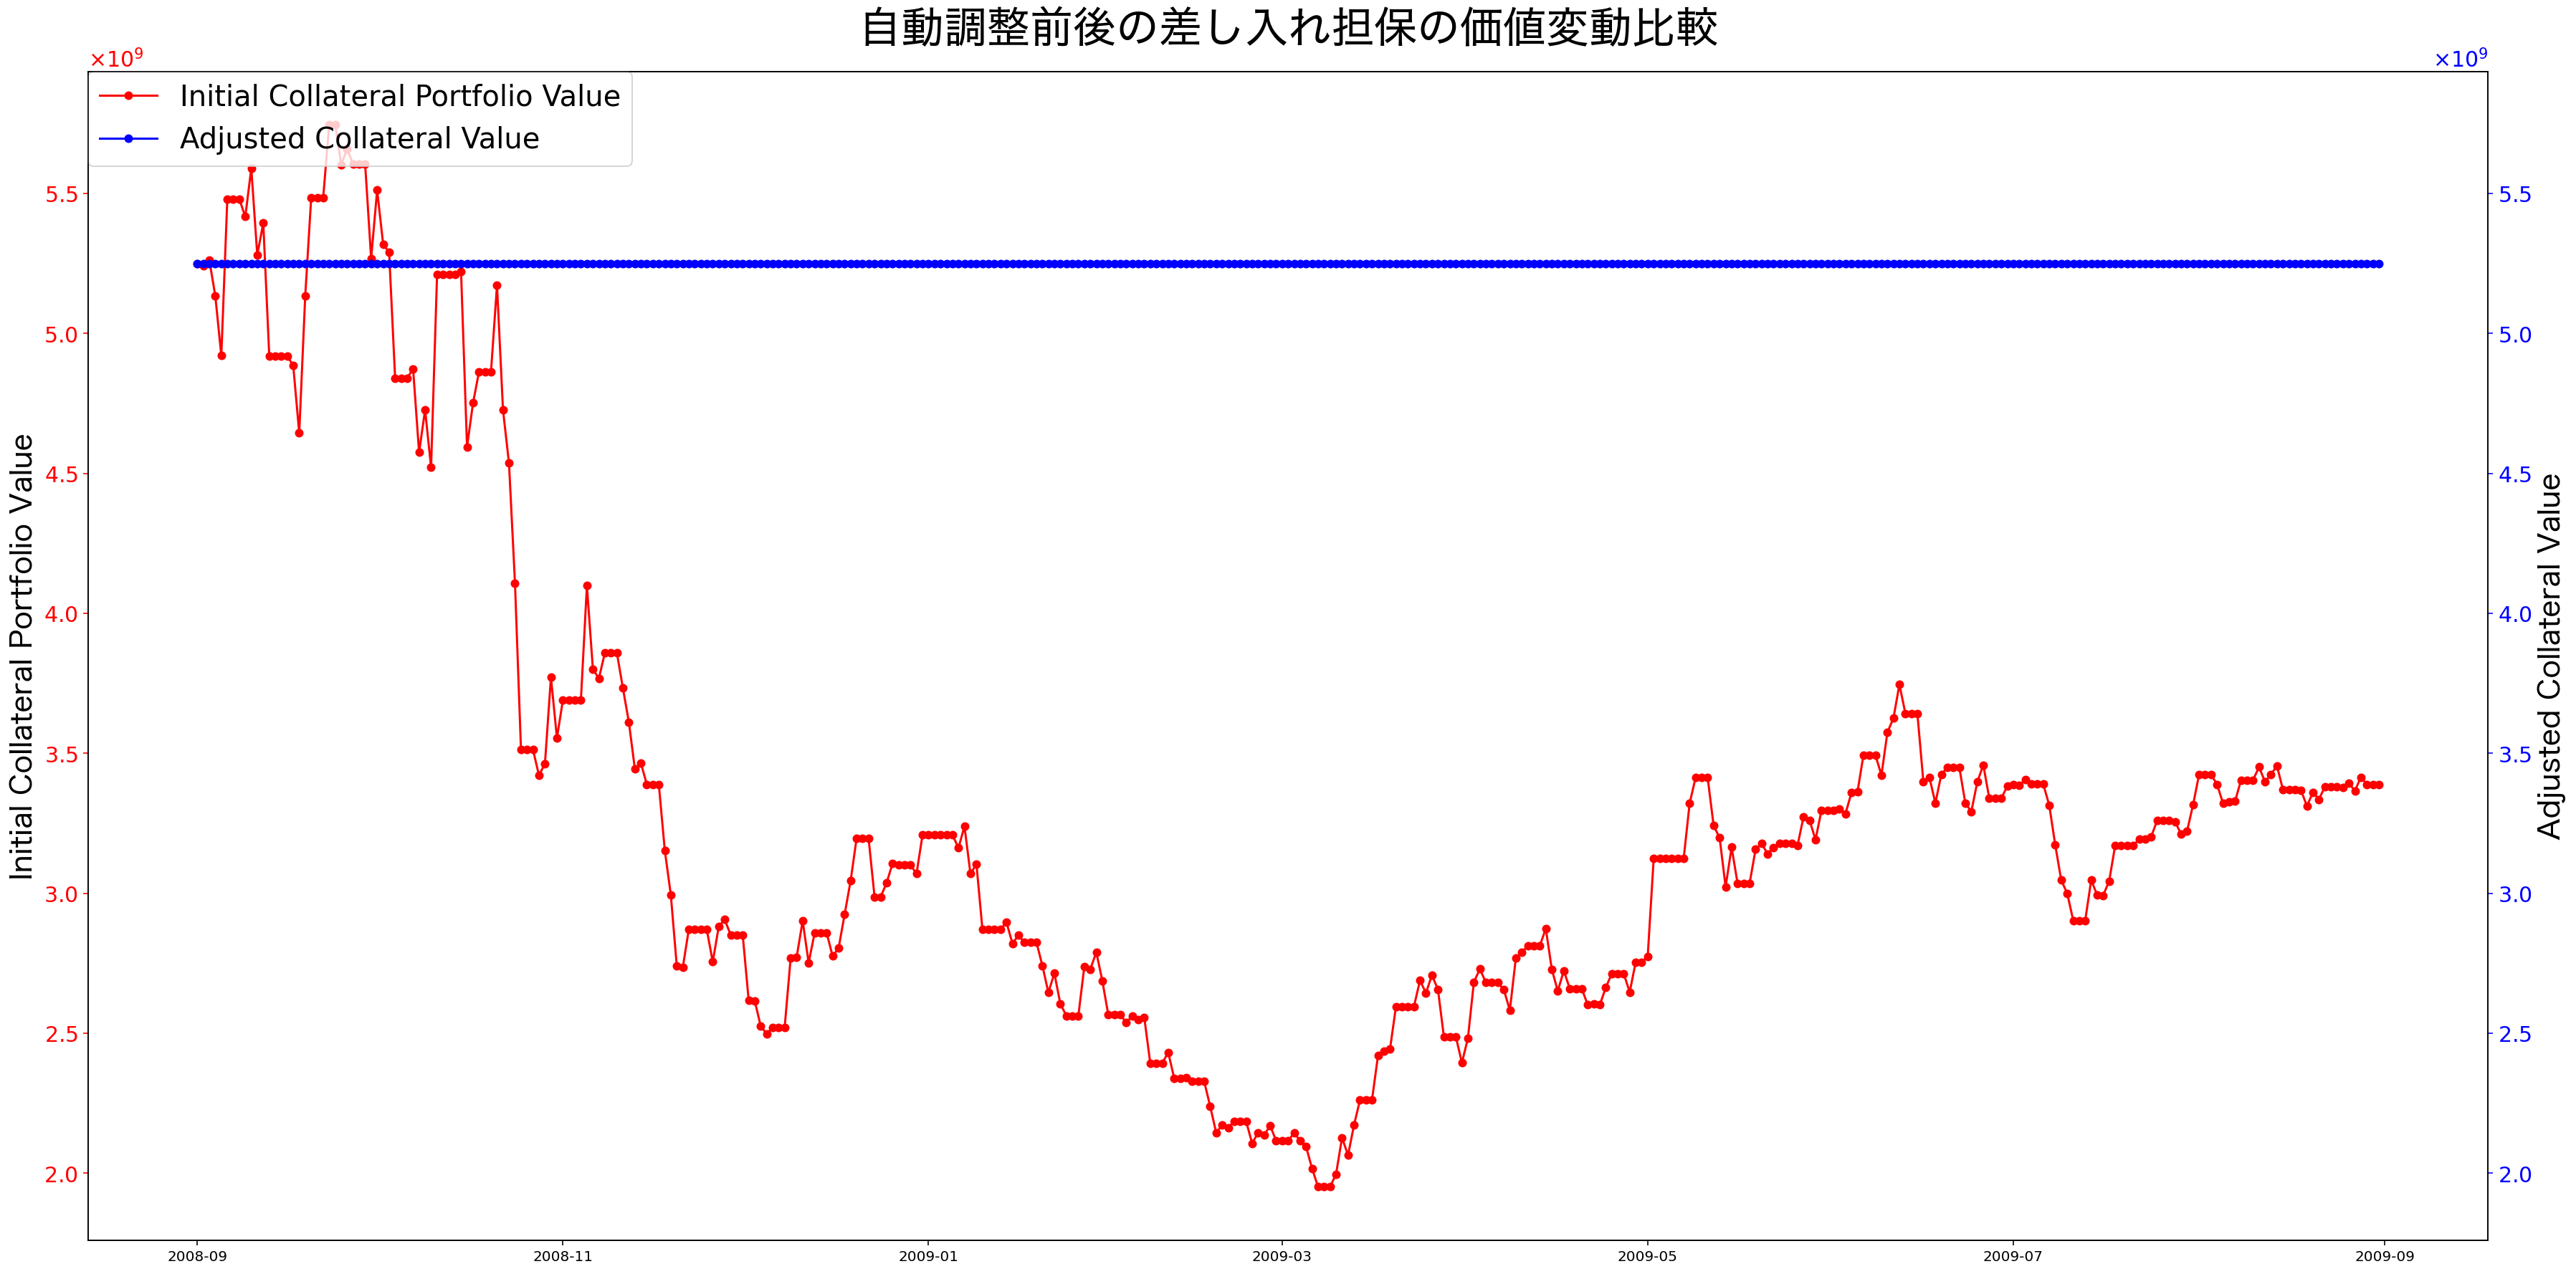

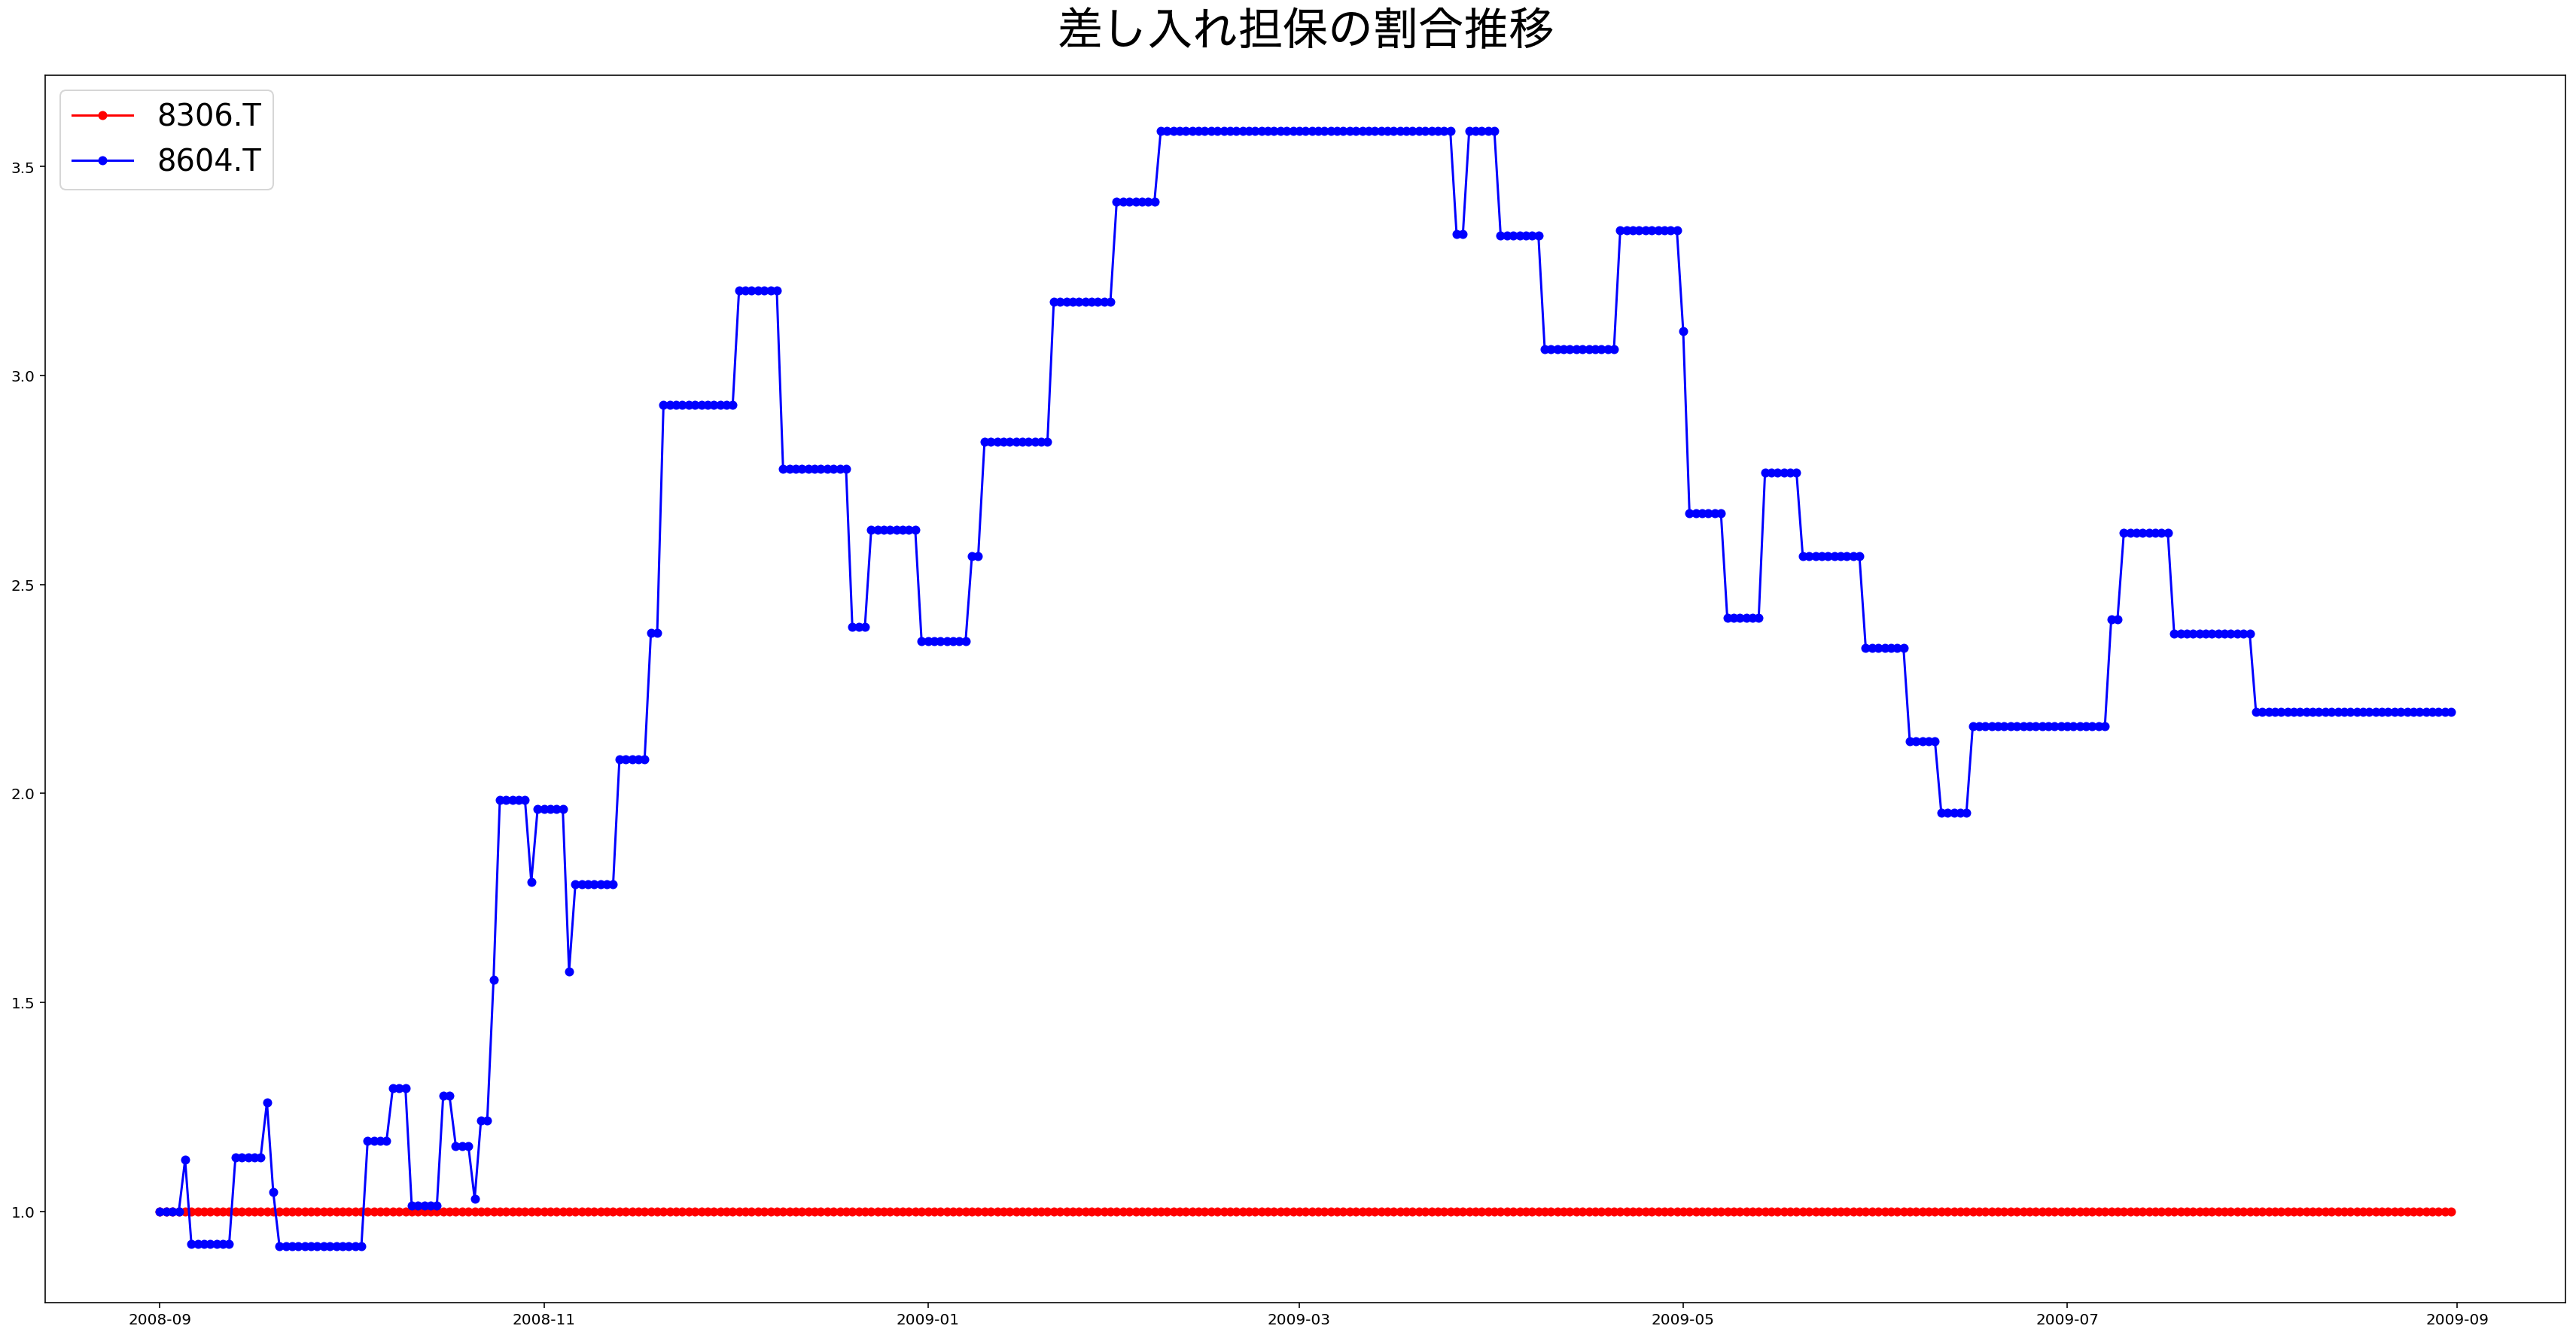

In [29]:
visualizer_4 = LogVisualizer(logs_4)
visualizer_4.compare_collateral_portfolio()
collateral_percentages_4 = visualizer_4.calc_collateral_percentage()
print(collateral_percentages_4)